In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Regulatory Affairs of Road Accident Data 2020 India.csv')

In [3]:
dataset.head()

Million Plus Cities   Cause category        Cause Subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   
3                Agra  Traffic Control  Flashing Signal/Blinker   
4                Agra  Traffic Control  Flashing Signal/Blinker   

         Outcome of Incident  Count  
0         Greviously Injured    0.0  
1               Minor Injury    0.0  
2             Persons Killed    0.0  
3              Total Injured    0.0  
4  Total number of Accidents    0.0

In [4]:
dataset.shape

(9550, 5)

In [79]:
dataset.isnull().sum()

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [80]:
dataset.fillna(0, inplace=True)

In [5]:
dataset['Cause category'].unique()

array(['Traffic Control', 'Junction', 'Traffic Violation',
       'Road Features', 'Impacting Vehicle/Object', 'Weather'],
      dtype=object)

In [6]:
dataset['Cause Subcategory'].unique()

array(['Flashing Signal/Blinker', 'Others', 'Police Controlled',
       'Stop Sign', 'Traffic Light Signal', 'Uncontrolled',
       'Four arm Junction', 'Round about Junction', 'Staggered Junction',
       'T', 'Y', 'Driving on Wrong side',
       'Drunken Driving/ Consumption of alcohol and drug',
       'Jumping Red Light', 'Over', 'Use of Mobile Phone', 'Bridge',
       'Culvert', 'Curved Road', 'Ongoing Road Works/Under Construction',
       'Pot Holes', 'Steep Grade', 'Straight Road', 'Auto Rickshaws',
       'Bicycles', 'Buses', 'Cars, Taxis, Vans and LMV', 'Other Non',
       'Pedestrian', 'Trucks/Lorries', 'Two Wheelers', 'Foggy and Misty',
       'Hail/Sleet', 'Rainy', 'Sunny/Clear'], dtype=object)

In [7]:
dataset['Million Plus Cities'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad(Prayagraj)', 'Amritsar',
       'Asansol Durgapur', 'Aurangabad', 'Bengaluru', 'Bhopal',
       'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Dhanbad',
       'Faridabad', 'Ghaziabad', 'Gwalior', 'Hyderabad', 'Indore',
       'Jabalpur', 'Jaipur', 'Jamshedpur', 'Jodhpur', 'Kannur', 'Kanpur',
       'Khozikode', 'Kochi', 'Kolkata', 'Kollam', 'Kota', 'Lucknow',
       'Ludhiana', 'Madurai', 'Mallapuram', 'Meerut', 'Mumbai', 'Nagpur',
       'Nashik', 'Patna', 'Pune', 'Raipur', 'Rajkot', 'Srinagar', 'Surat',
       'Thiruvanthapuram', 'Thrissur', 'Tiruchirapalli', 'Vadodra',
       'Varanasi', 'Vijaywada city', 'Vizaq'], dtype=object)

In [10]:
dataset['Outcome of Incident'].unique()

array(['Greviously Injured', 'Minor Injury', 'Persons Killed',
       'Total Injured', 'Total number of Accidents'], dtype=object)

Text(0.5, 1.0, 'Graph depicting Count of type of casualities due to accidents')

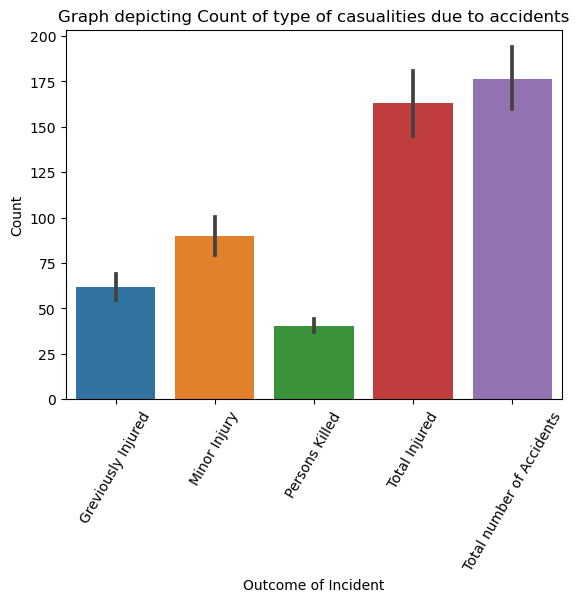

In [81]:
sns.barplot(dataset, x='Outcome of Incident', y='Count')
plt.xticks(rotation=60)
plt.title('Graph depicting Count of type of casualities due to accidents')

Text(0.5, 1.0, 'Graph depicting Count of cause of accidents')

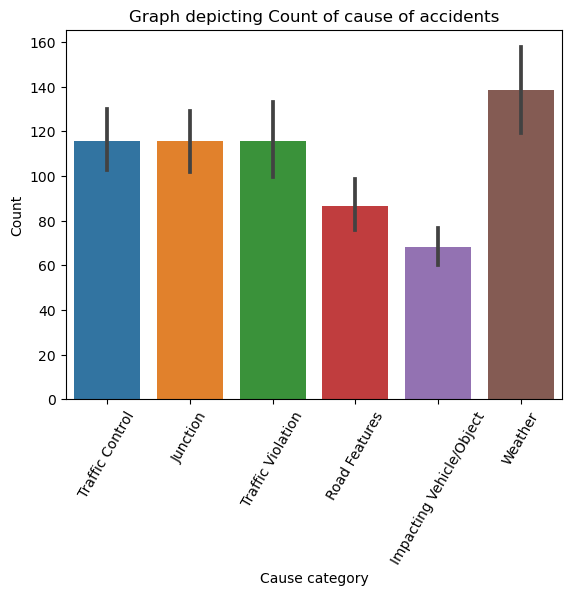

In [22]:
sns.barplot(dataset, x=dataset['Cause category'], y=dataset['Count'])
plt.xticks(rotation=60)
plt.title('Graph depicting Count of cause of accidents')

Text(0.5, 1.0, 'Graph depicting Count of cause of accidents')

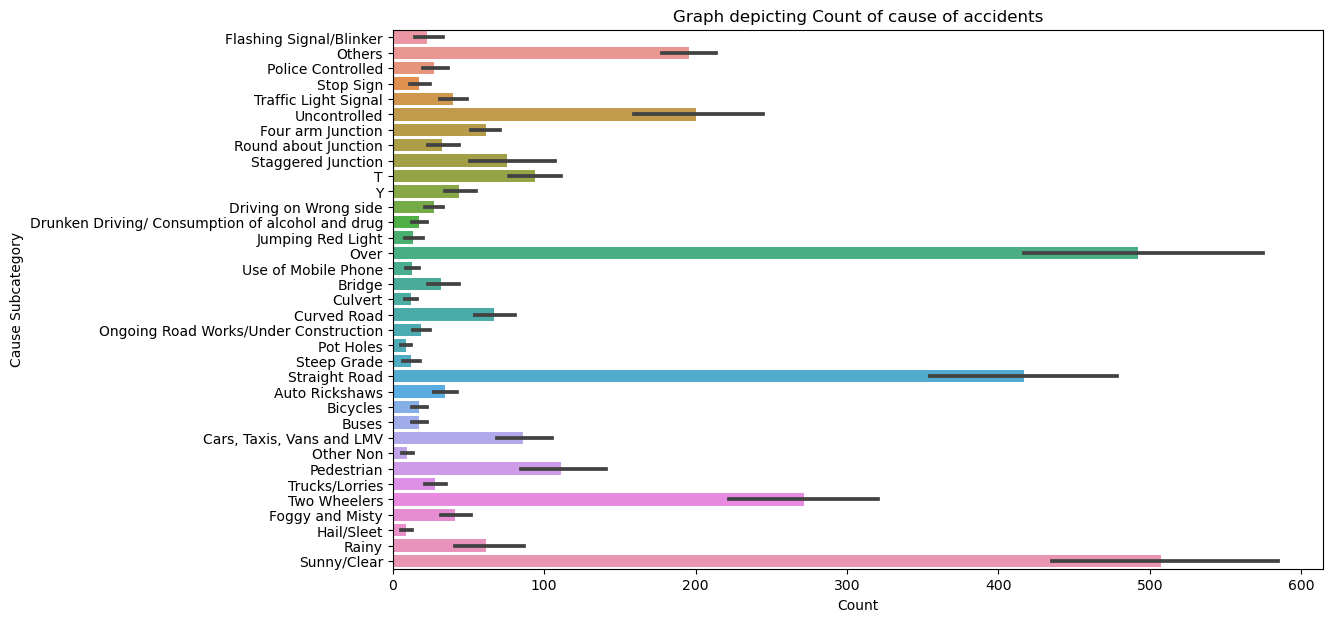

In [28]:
plt.figure(figsize=(12,7))
sns.barplot(dataset, y=dataset['Cause Subcategory'], x=dataset['Count'])
plt.title('Graph depicting Count of cause of accidents')

In [32]:
dataset.groupby(['Cause Subcategory'])['Count'].sum().sort_values(ascending=False)

Cause Subcategory
Others                                              283486.00
Sunny/Clear                                         126904.00
Over                                                123013.00
Straight Road                                       104223.00
Two Wheelers                                         54356.00
Uncontrolled                                         50001.00
T                                                    23555.00
Pedestrian                                           22189.00
Staggered Junction                                   18910.00
Cars, Taxis, Vans and LMV                            17263.00
Curved Road                                          16734.75
Rainy                                                15421.00
Four arm Junction                                    15314.00
Y                                                    10892.00
Foggy and Misty                                      10326.00
Traffic Light Signal                                

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


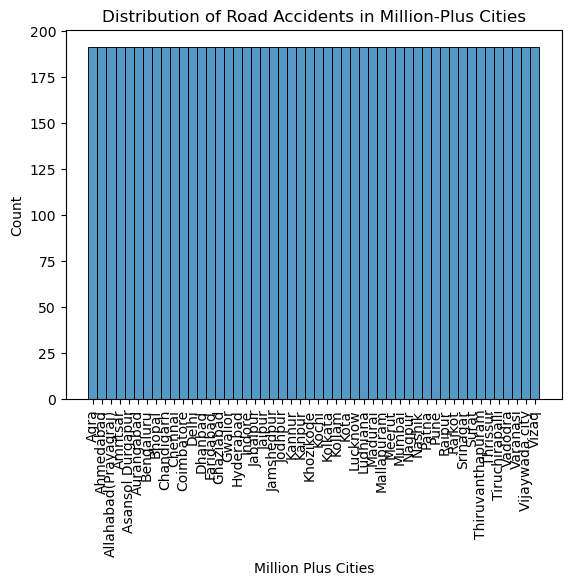

In [37]:
sns.histplot(dataset['Million Plus Cities'])
plt.title('Distribution of Road Accidents in Million-Plus Cities')
plt.xticks(rotation=90)
plt.show()

In [43]:
cause_aggregated = dataset.groupby(['Cause category', 'Outcome of Incident'])['Count'].sum().unstack()

In [88]:
cause_aggregated = cause_aggregated.drop(columns=['Total Injured', 'Total number of Accidents'])

In [89]:
cause_aggregated

Outcome of Incident       Greviously Injured  Minor Injury  Persons Killed
Cause category                                                            
Impacting Vehicle/Object             20532.0       29983.0         13542.0
Junction                             20532.0       29983.0         13542.0
Road Features                        20532.0       29983.0         13542.0
Traffic Control                      20532.0       29983.0         13542.0
Traffic Violation                    20532.0       29983.0         13542.0
Weather                              20532.0       29983.0         13542.0

In [50]:
cause_aggregated.index

Index(['Impacting Vehicle/Object', 'Junction', 'Road Features',
       'Traffic Control', 'Traffic Violation', 'Weather'],
      dtype='object', name='Cause category')

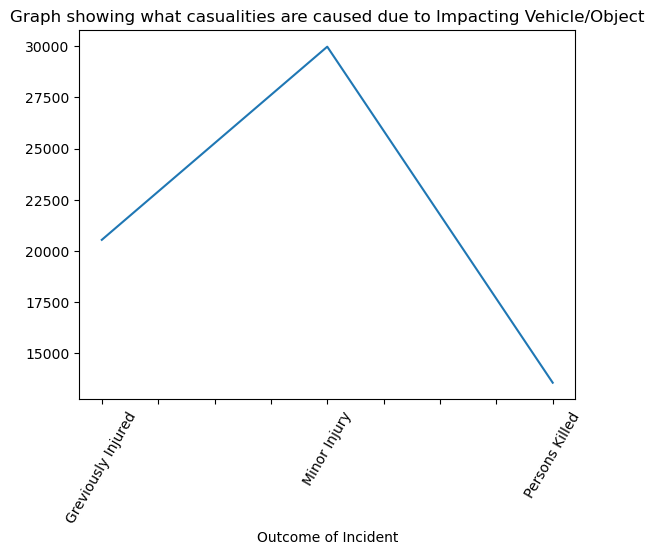

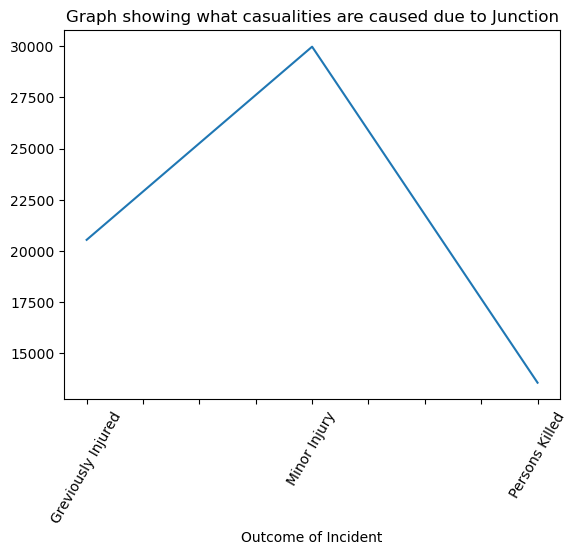

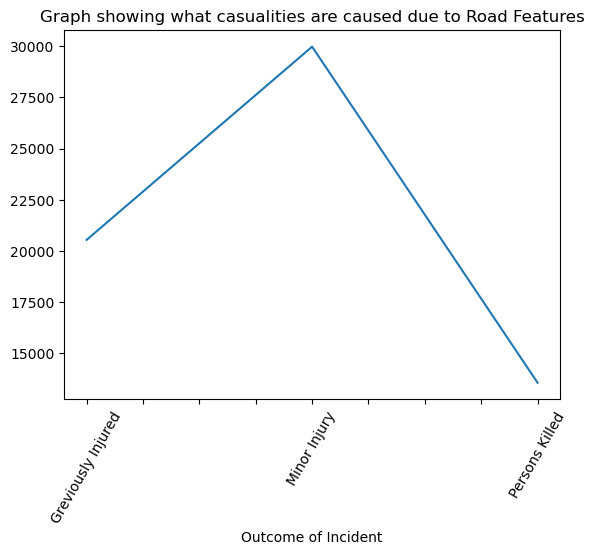

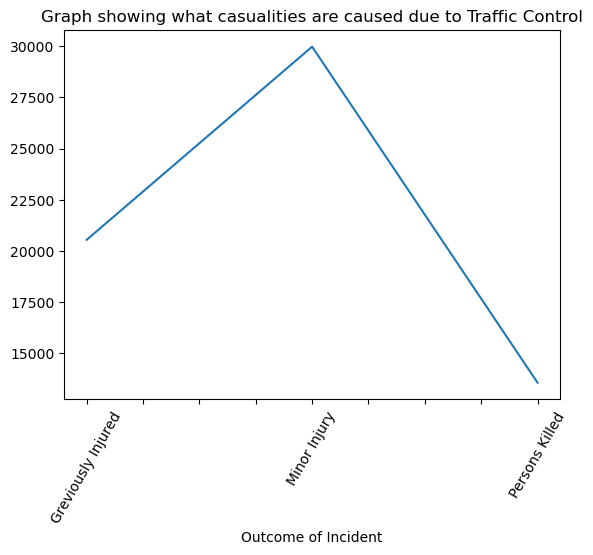

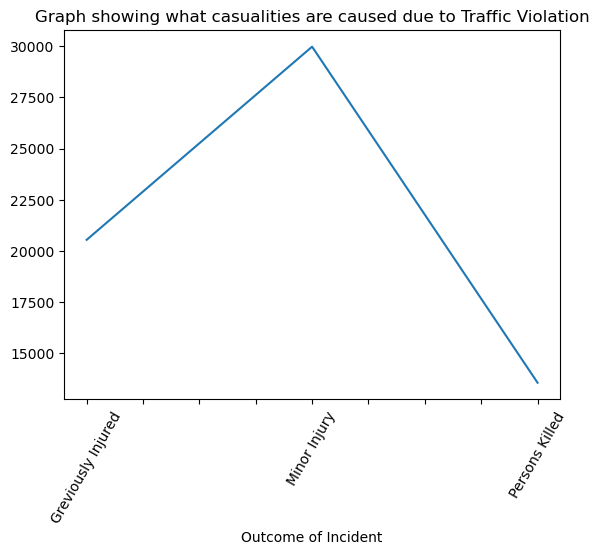

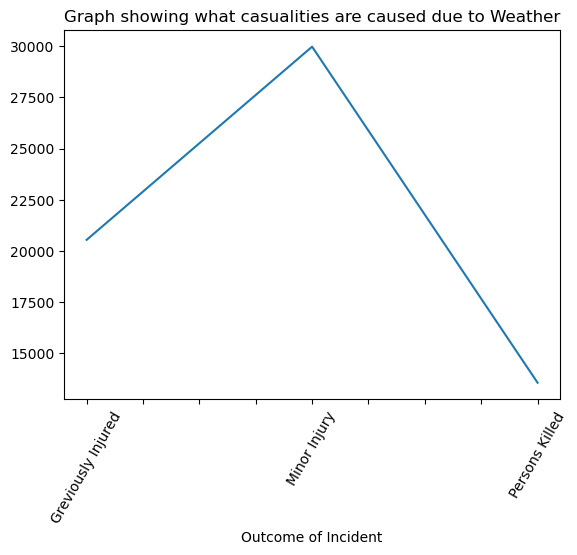

In [90]:
for cause in cause_aggregated.index:
    cause_aggregated.loc[cause].plot()
    plt.title('Graph showing what casualities are caused due to ' + cause)
    plt.xticks(rotation=60)
    plt.show()


In [75]:
cities_aggregated = dataset.groupby(['Million Plus Cities', 'Outcome of Incident'])['Count'].sum().unstack().
                    sort_values(by='Persons Killed', ascending=False)

In [85]:
cities_aggregated = cities_aggregated.drop(columns=['Total Injured', 'Total number of Accidents'])

In [86]:
cities_aggregated

Outcome of Incident   Greviously Injured  Minor Injury  Persons Killed
Million Plus Cities                                                   
Delhi                             1272.0       20700.0          7176.0
Chennai                           5646.0       19932.0          5232.0
Bengaluru                        10242.0        6264.0          3876.0
Jaipur                            2664.0        6744.0          3636.0
Kanpur                            4158.0         510.0          3378.0
Allahabad(Prayagraj)               726.0        3666.0          3102.0
Agra                              2262.0        1536.0          3084.0
Raipur                             294.0        7470.0          2892.0
Indore                            1332.0       14556.0          2754.0
Jabalpur                          2940.0       16602.0          2532.0
Lucknow                           1836.0        1488.0          2244.0
Mumbai                            7782.0        2658.0          2094.0
Meerut                             162.0        2760.0          2094.0
Ahmedabad                         2856.0        1860.0          2040.0
Ghaziabad                         1782.0        1008.0          1956.0
Gwalior                            570.0        7404.0          1896.0
Asansol Durgapur                  1218.0         258.0          1890.0
Ludhiana                           834.0         270.0          1698.0
Vijaywada city                    2454.0        3408.0          1644.0
Vizaq                             4764.0        2328.0          1530.0
Hyderabad                          582.0       10770.0          1524.0
Mallapuram                        8208.0        2760.0          1482.0
Bhopal                            1116.0        9726.0          1422.0
Varanasi                          1092.0         738.0          1278.0
Nagpur                            2520.0        1992.0          1260.0
Kolkata                           5064.0        3342.0          1206.0
Faridabad                          390.0        2136.0          1170.0
Kollam                            7236.0        1050.0          1164.0
Surat                             1908.0         630.0          1146.0
Patna                             1368.0          90.0          1086.0
Nashik                            1722.0         468.0          1026.0
Vadodra                           1446.0        1002.0           918.0
Pune                              1782.0         546.0           858.0
Jodhpur                            198.0        1044.0           852.0
Rajkot                            1206.0         738.0           828.0
Aurangabad                        1320.0         438.0           816.0
Thrissur                          6612.0        3180.0           804.0
Thiruvanthapuram                  6144.0        1434.0           648.0
Kochi                             6732.0        1704.0           606.0
Khozikode                         4572.0        1500.0           546.0
Tiruchirapalli                       0.0        2406.0           522.0
Dhanbad                            432.0         156.0           498.0
Madurai                            672.0        2322.0           486.0
Amritsar                           228.0         126.0           396.0
Coimbatore                        2082.0        2250.0           390.0
Kota                               402.0        1770.0           360.0
Kannur                            1824.0        1614.0           342.0
Chandigarh                          84.0         804.0           318.0
Jamshedpur                         456.0          90.0           282.0
Srinagar                             0.0        1650.0           270.0

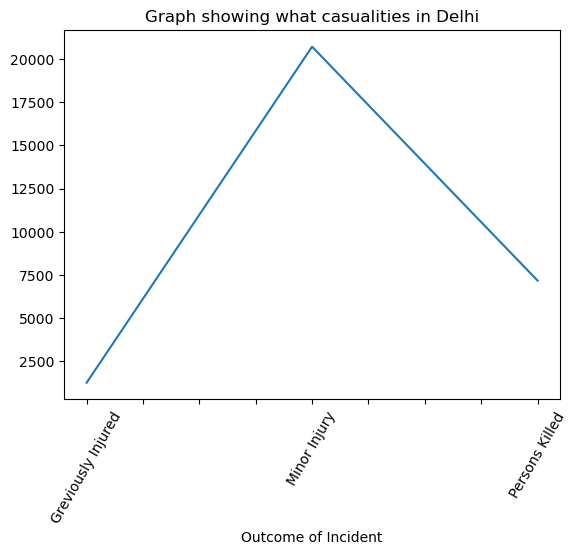

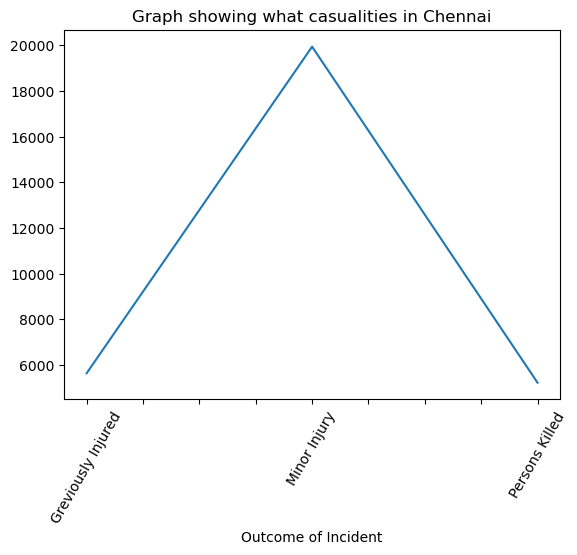

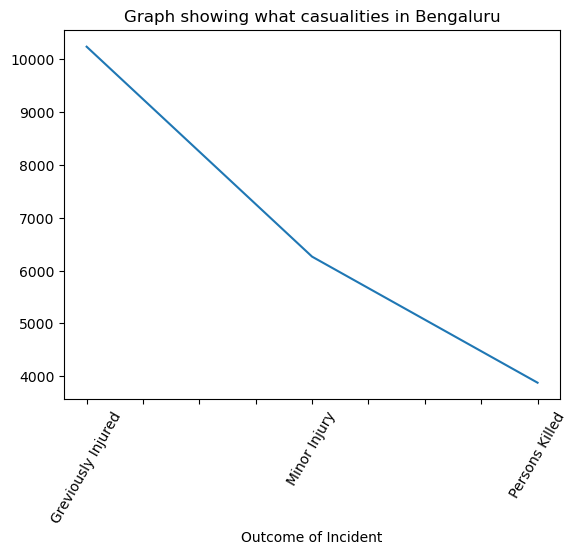

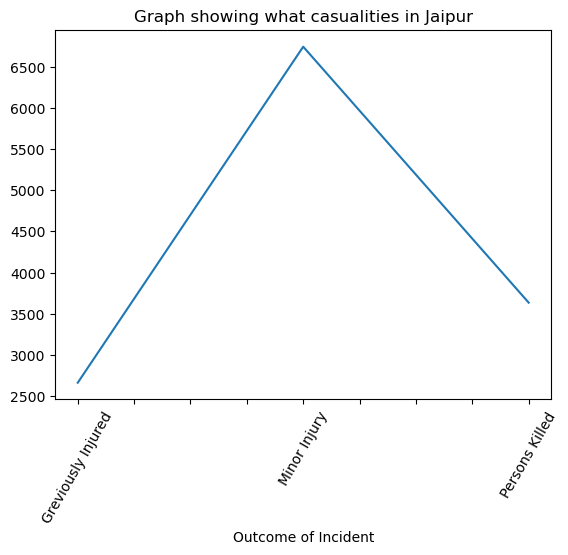

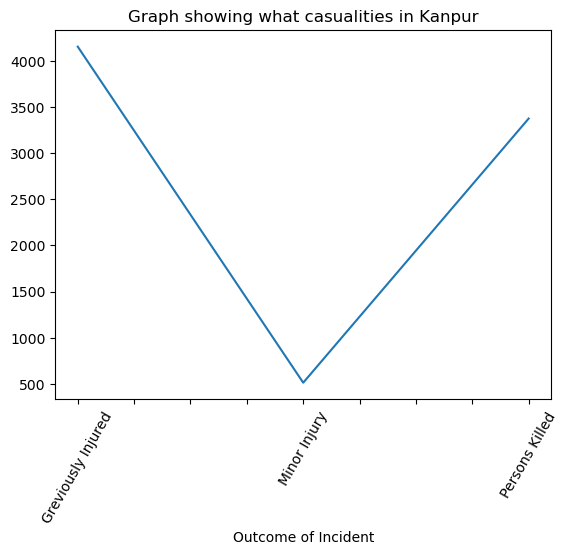

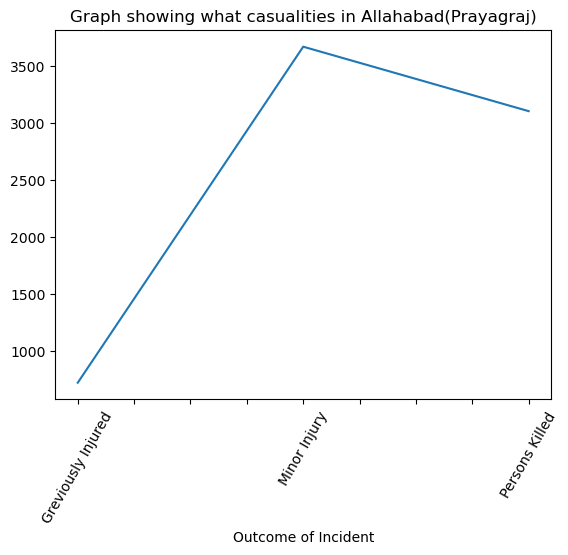

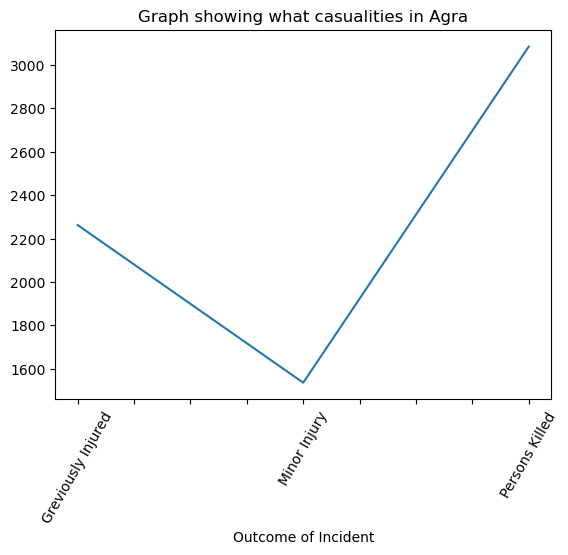

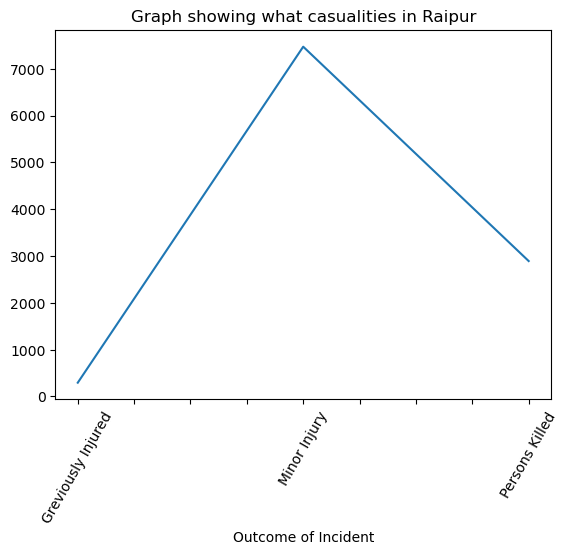

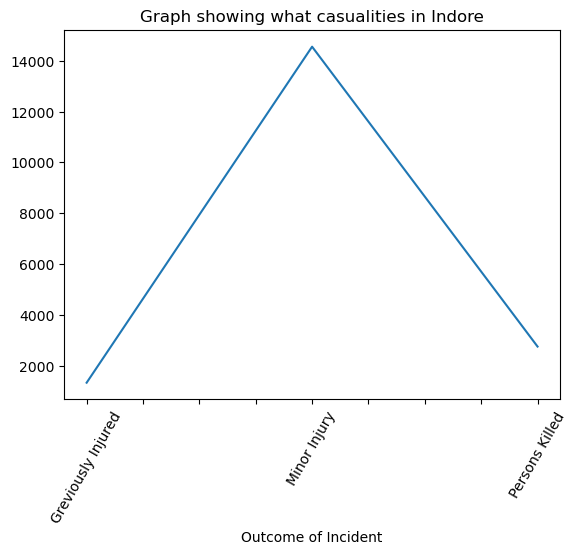

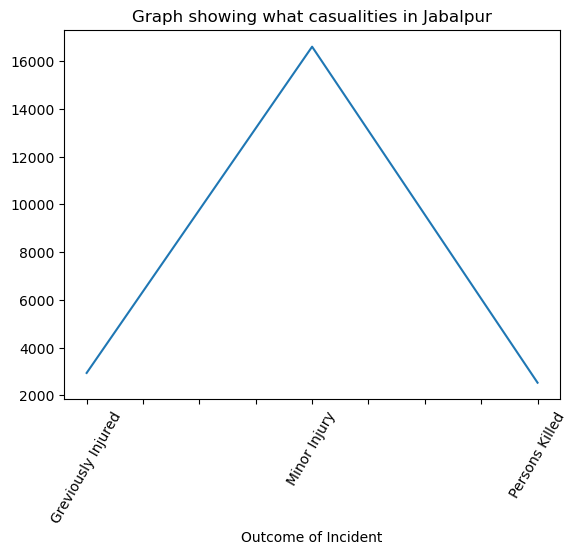

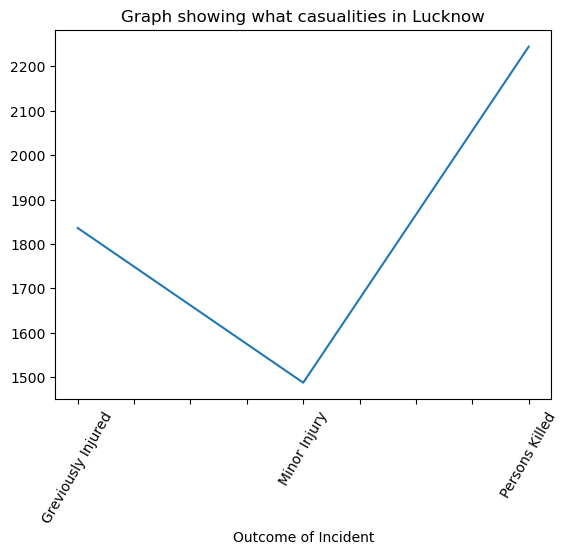

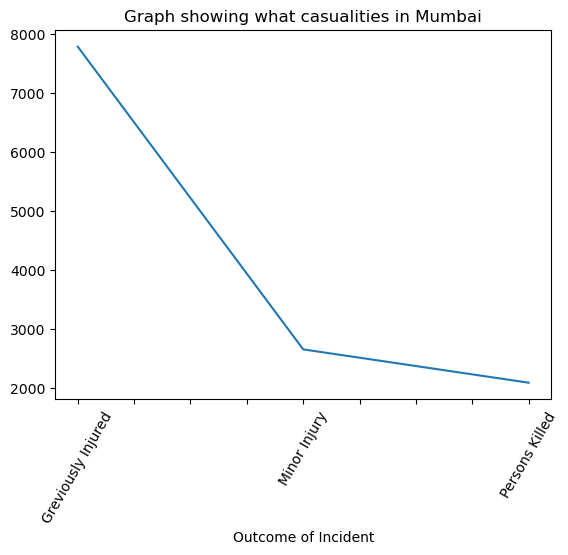

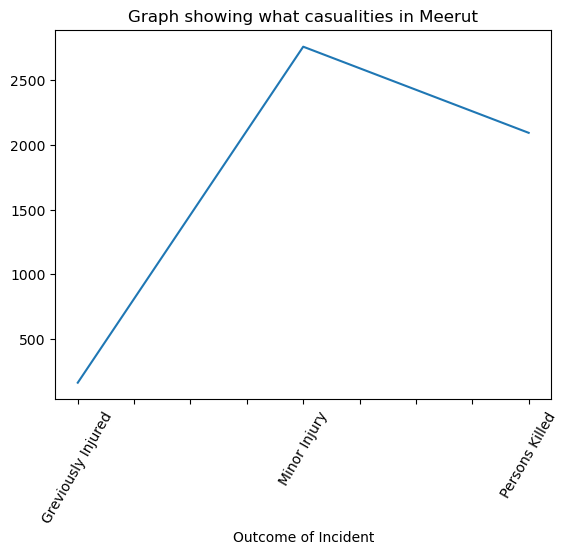

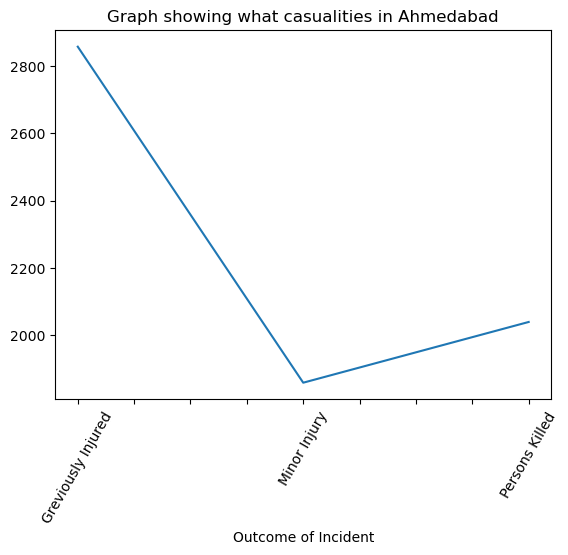

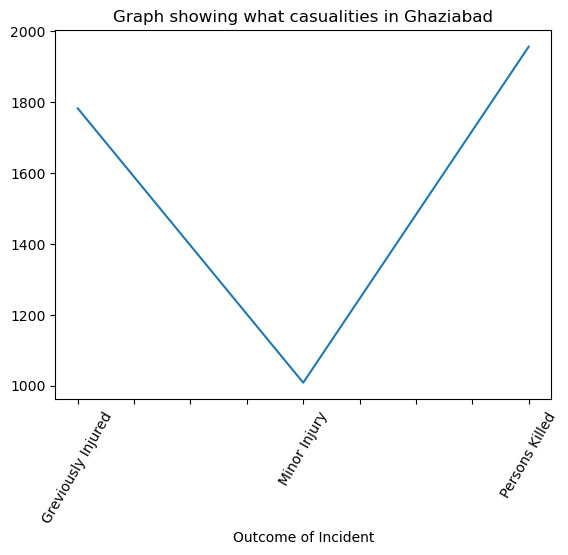

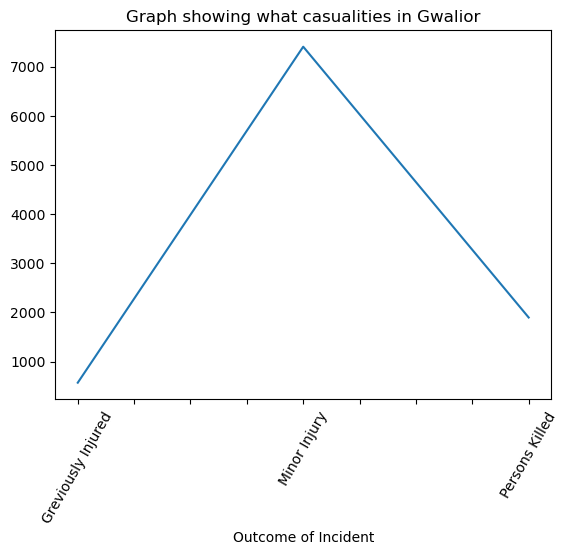

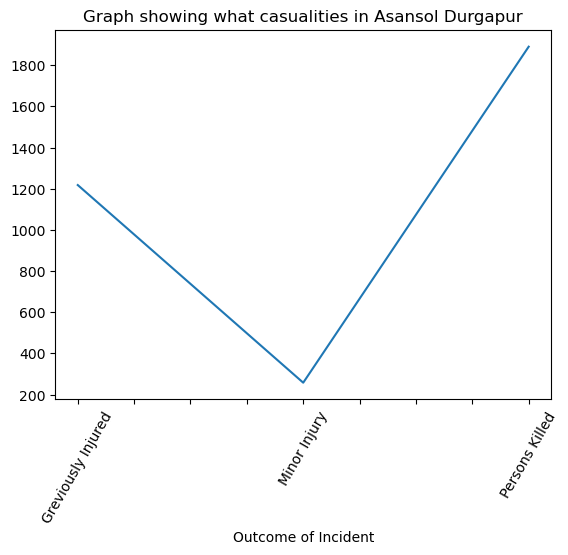

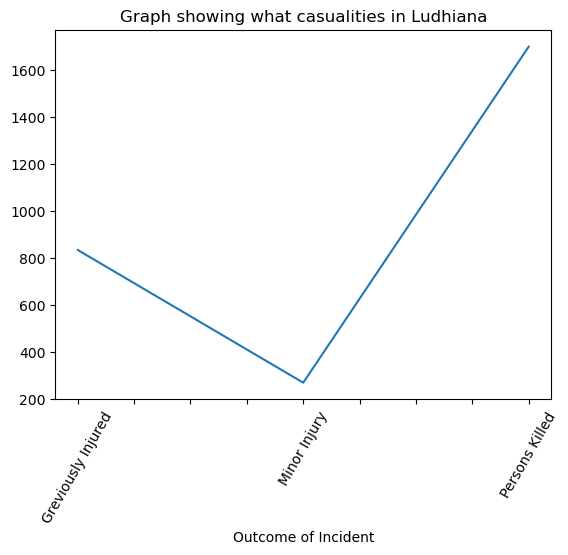

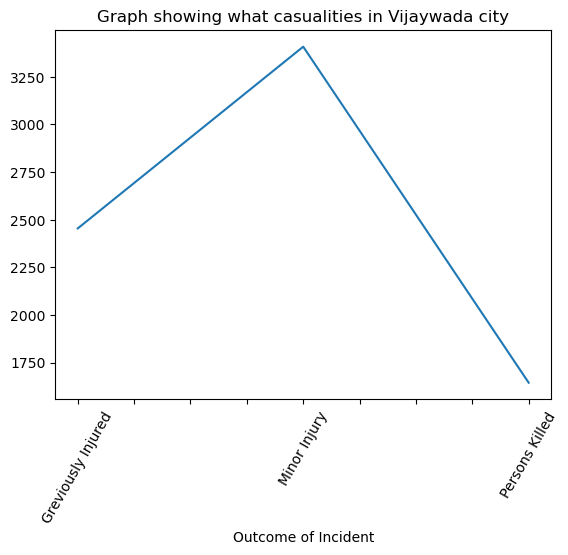

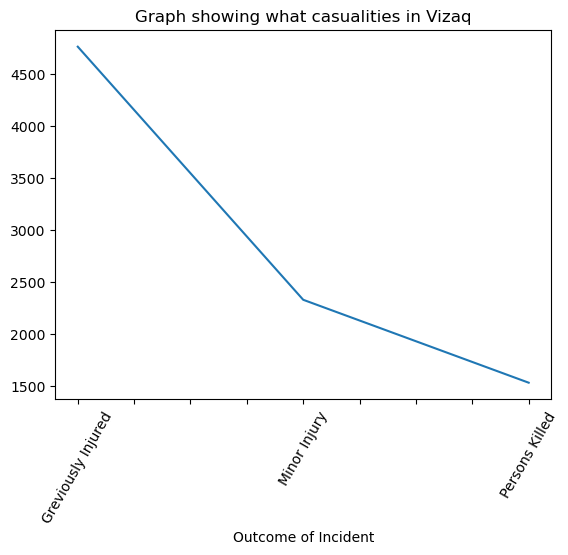

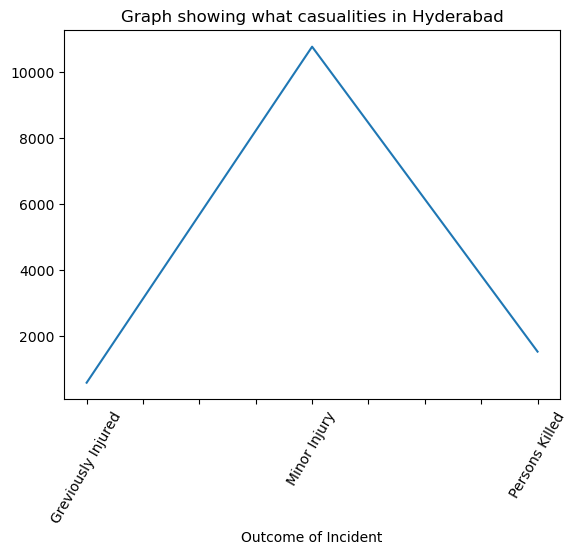

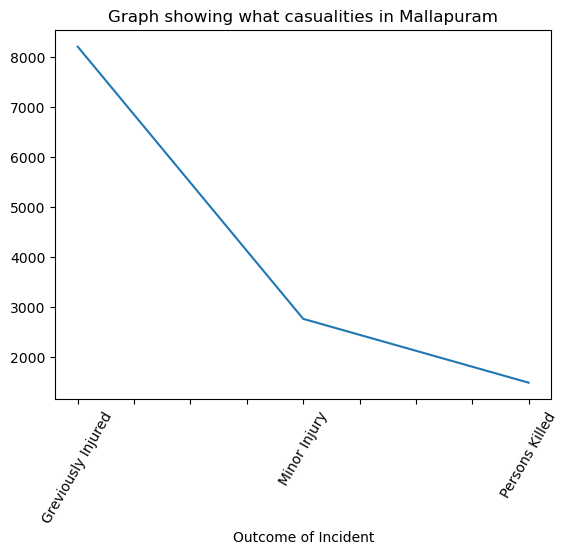

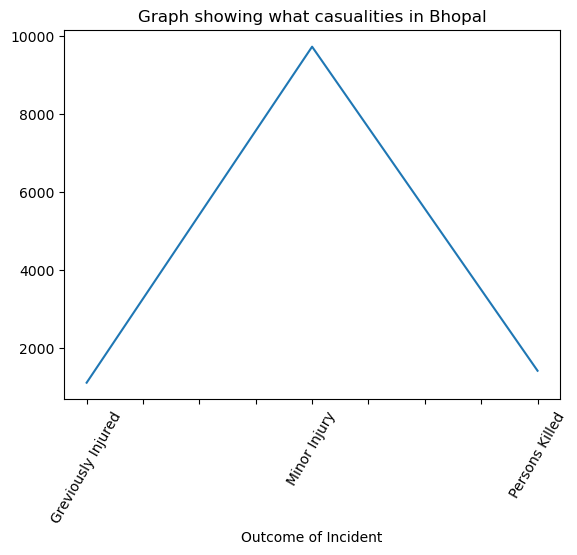

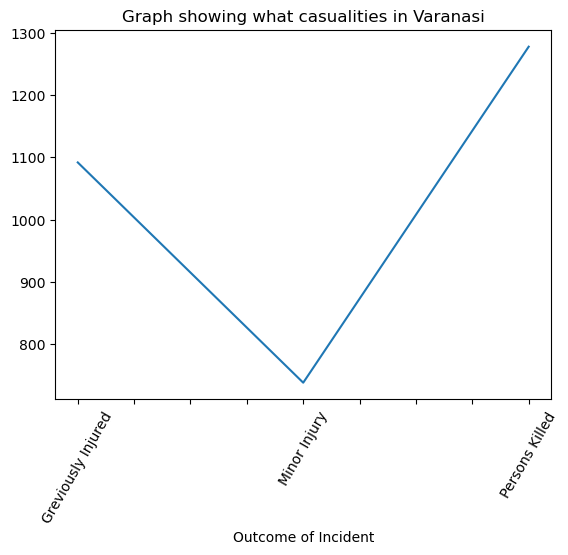

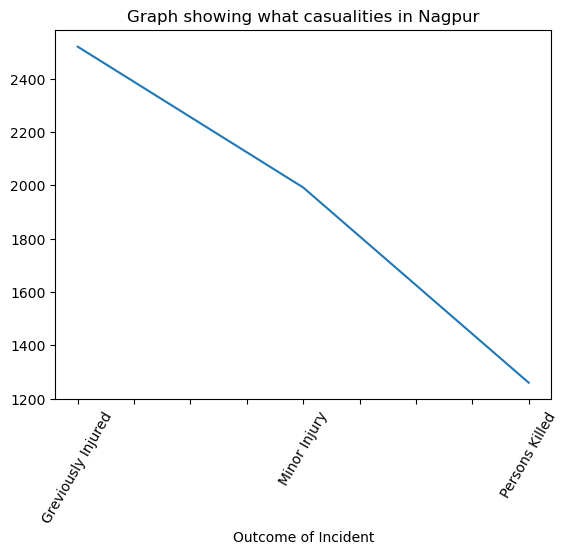

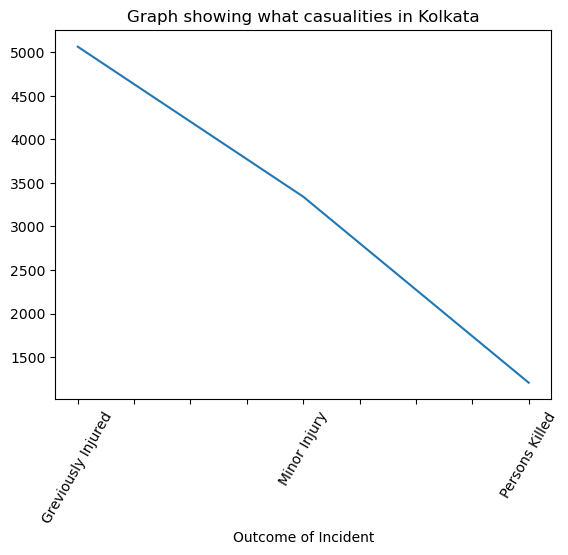

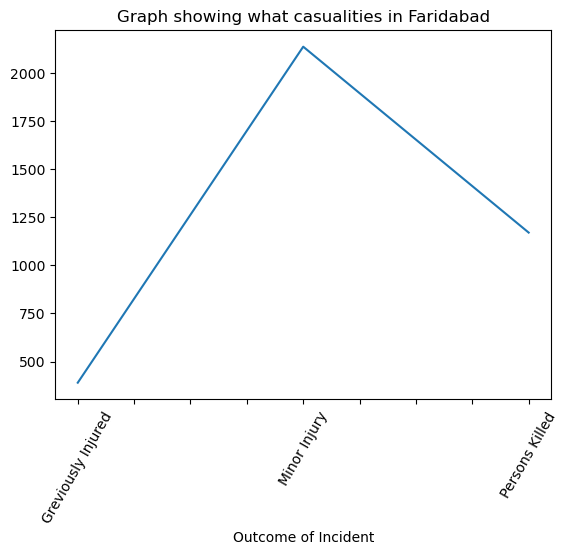

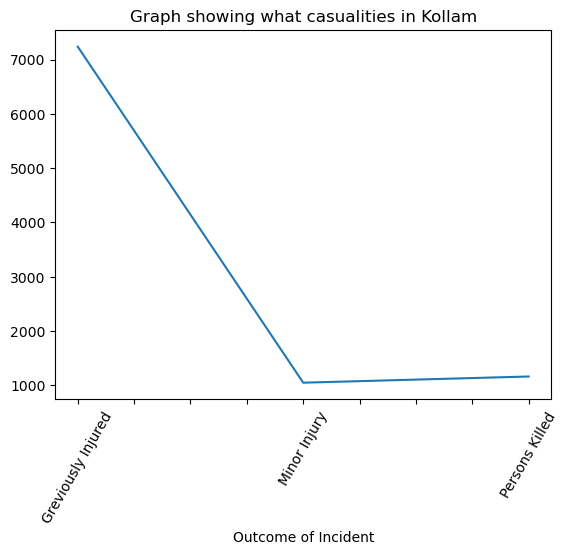

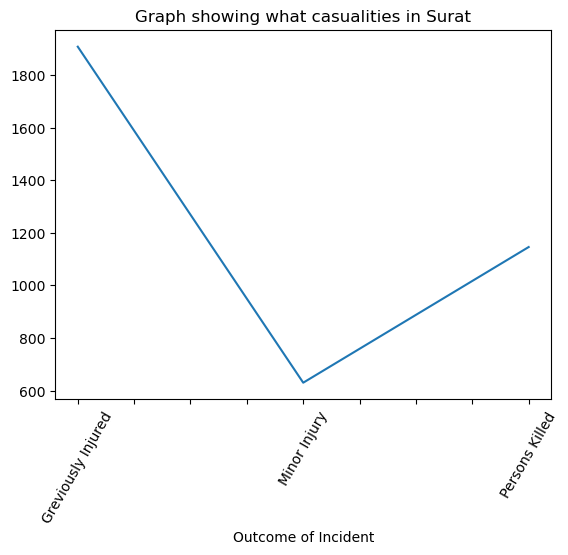

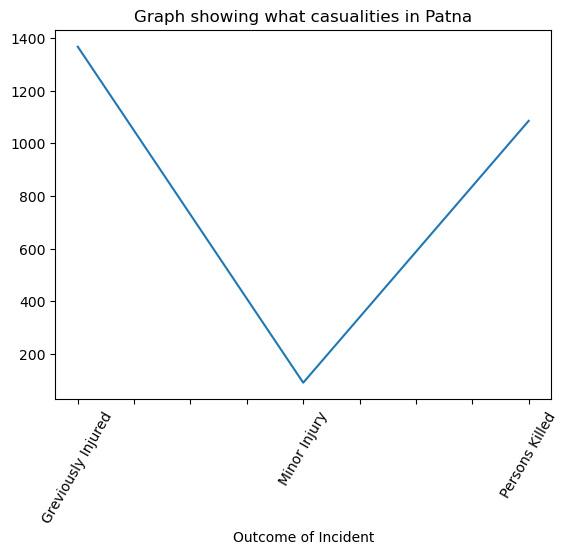

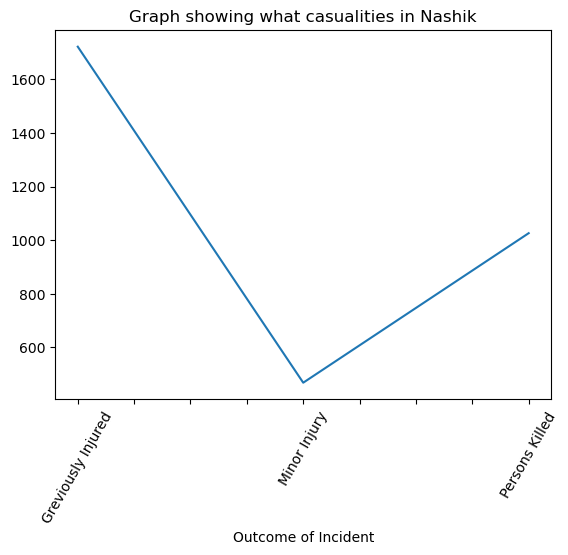

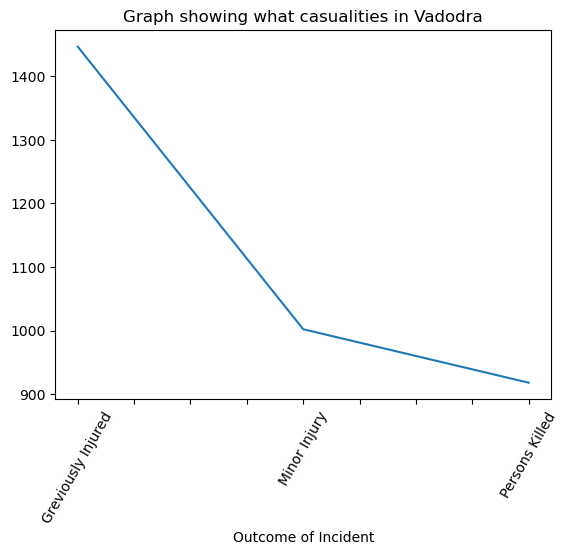

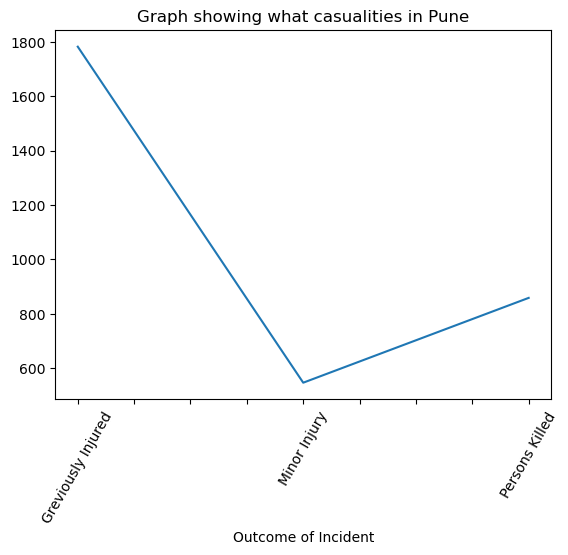

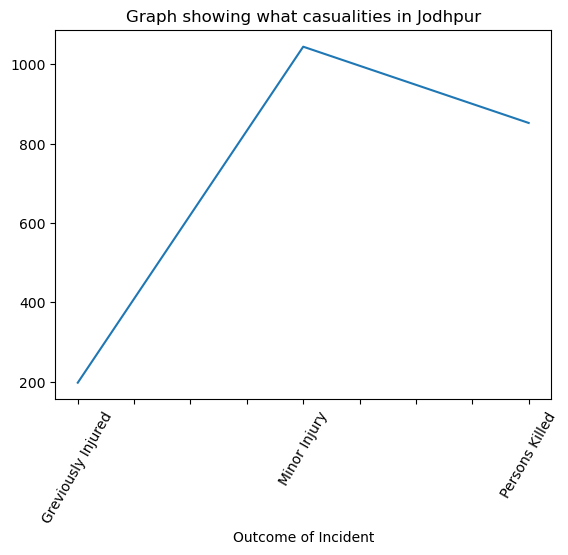

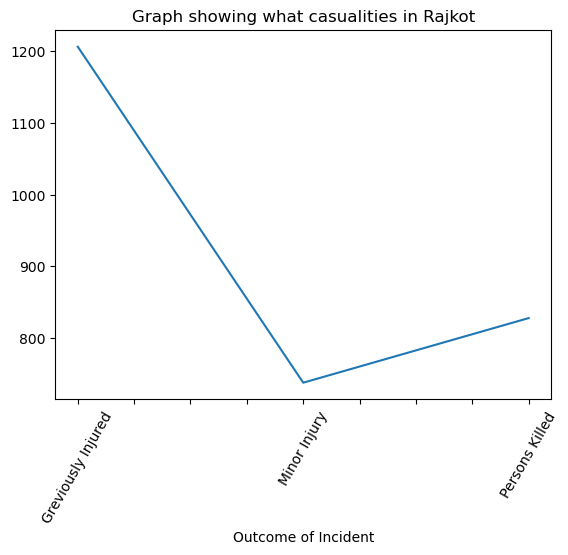

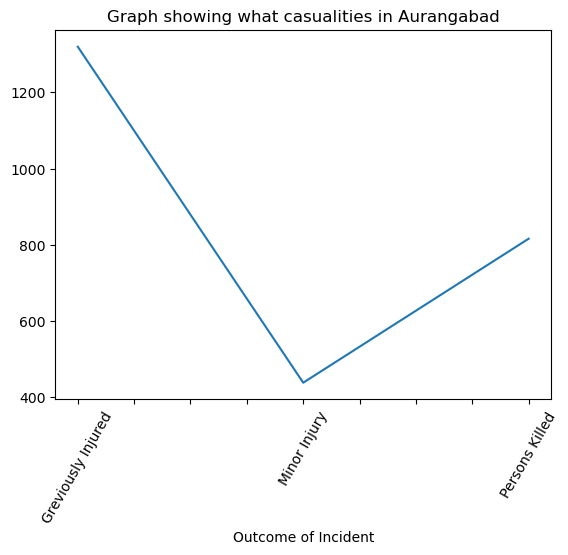

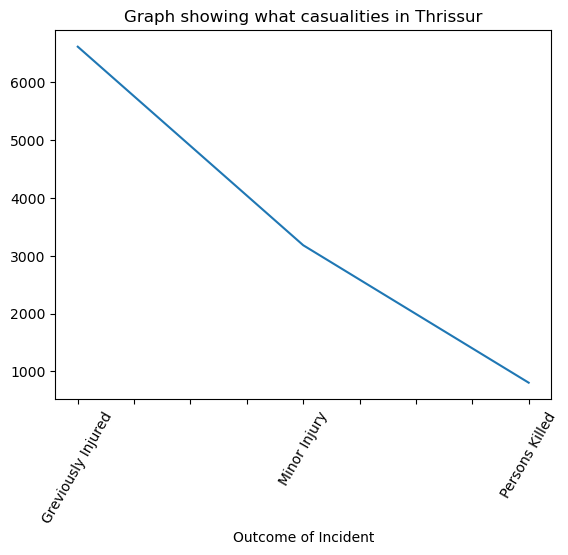

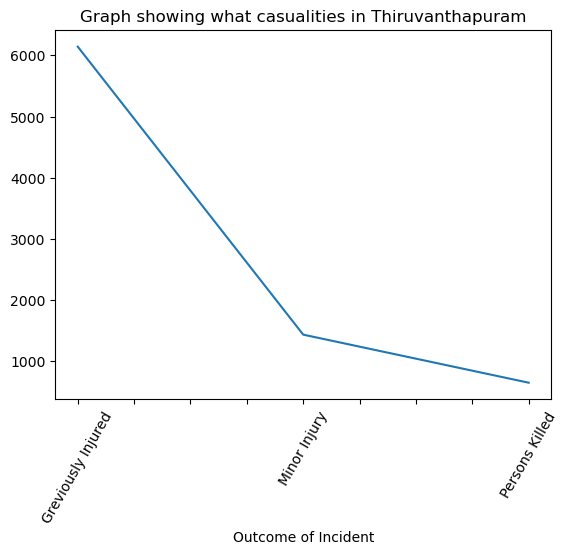

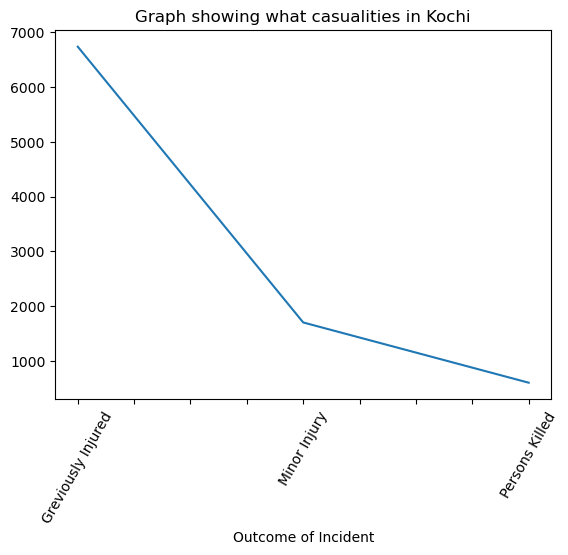

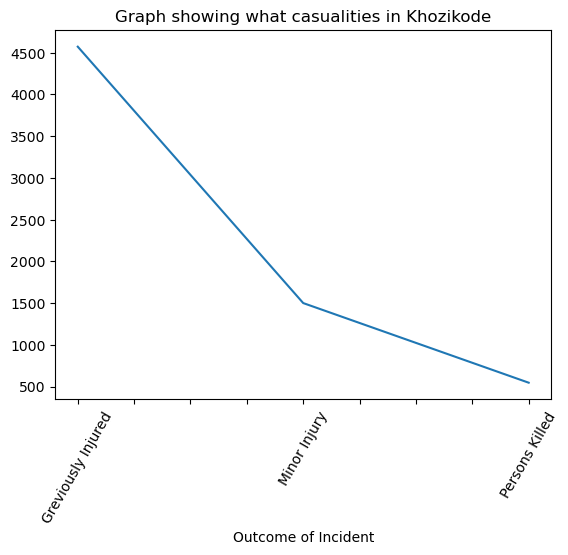

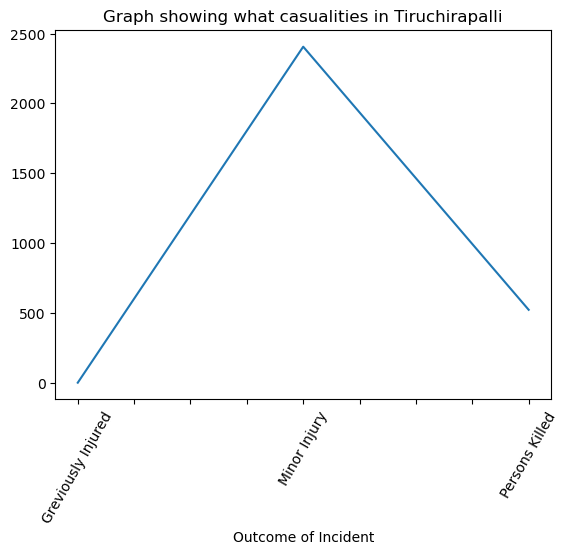

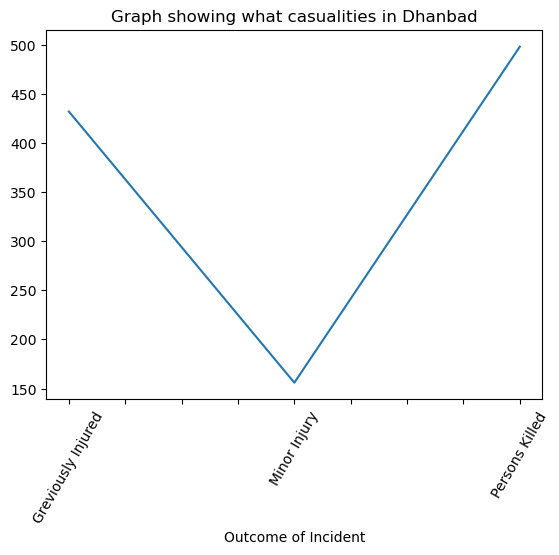

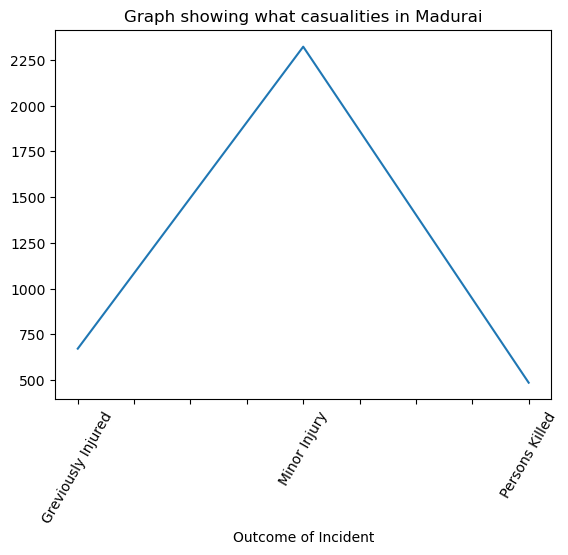

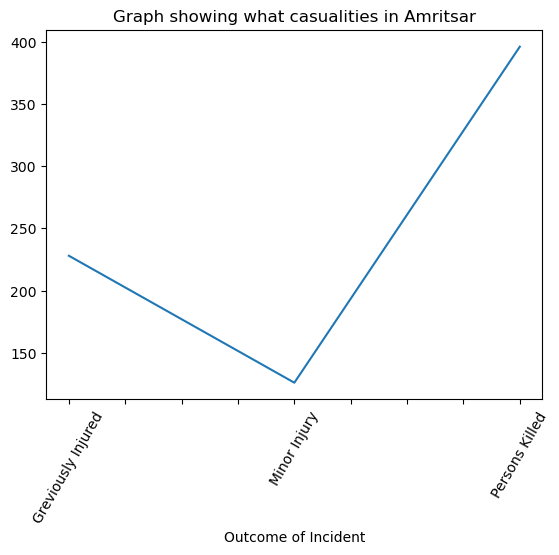

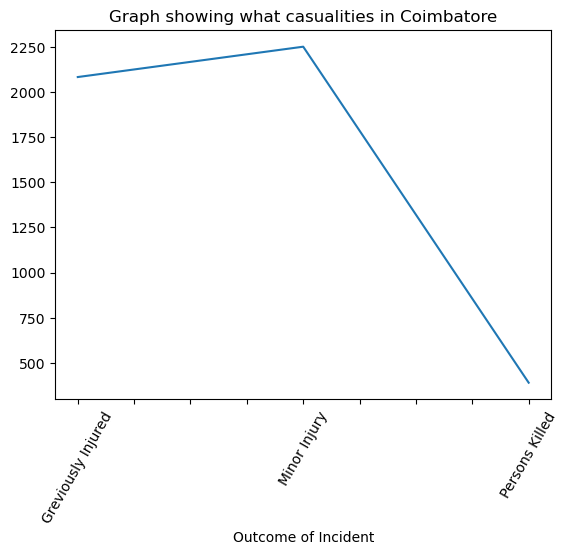

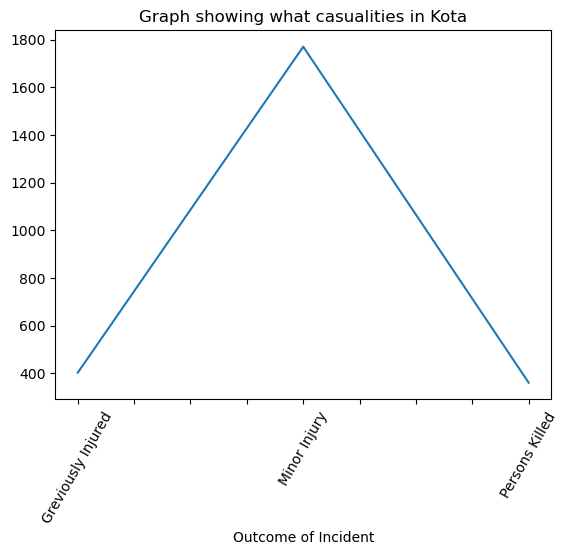

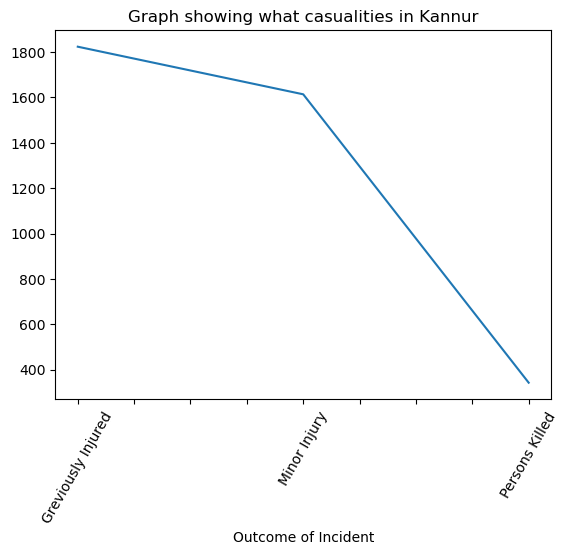

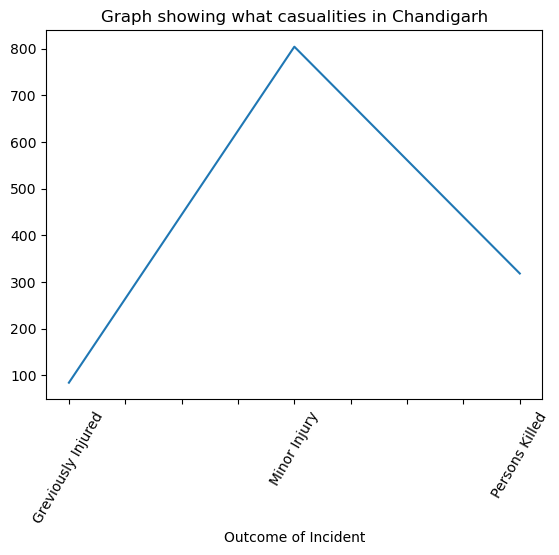

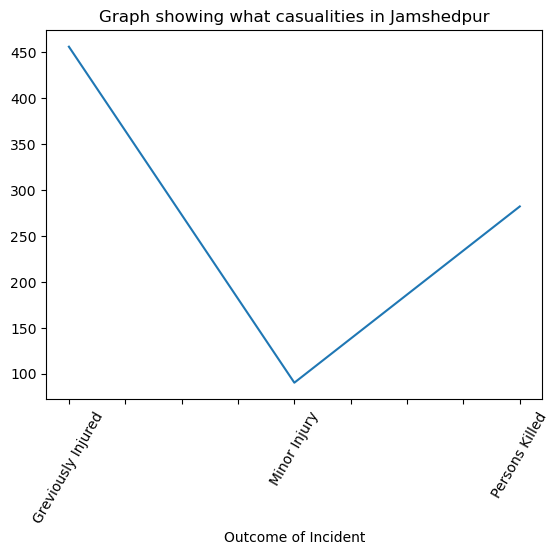

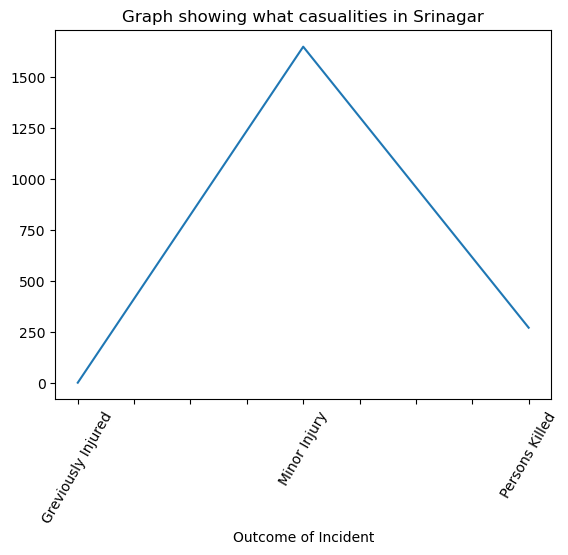

In [87]:
for city in cities_aggregated.index:
    cities_aggregated.loc[city].plot()
    plt.title('Graph showing what casualities in ' + city)
    plt.xticks(rotation=60)
    plt.show()

In [69]:
cities_aggregated_by_cause = dataset.groupby(['Million Plus Cities', 'Cause Subcategory'])['Count'].sum().sort_values(ascending=False).unstack()

In [68]:
cities_aggregated_by_cause

Cause Subcategory     Auto Rickshaws  Bicycles  Bridge  Buses  \
Million Plus Cities                                             
Agra                           109.0     125.0   142.0   98.0   
Ahmedabad                      163.0      84.0    60.0    4.0   
Allahabad(Prayagraj)           284.0     169.0   370.0  220.0   
Amritsar                        10.0      23.0    30.0    0.0   
Asansol Durgapur                 0.0      96.0    45.0   42.0   
Aurangabad                      32.0       2.0    17.0   10.0   
Bengaluru                      163.0      52.0   295.0   27.0   
Bhopal                          20.0       6.0   122.0   17.0   
Chandigarh                      11.0      44.0     0.0    0.0   
Chennai                        925.0     794.0  2487.0  649.0   
Coimbatore                      14.0      44.0   102.5   13.0   
Delhi                          216.0     314.0   614.0   25.0   
Dhanbad                         16.0      29.0    26.0    5.0   
Faridabad                       50.0      59.0   157.0    0.0   
Ghaziabad                      247.0     146.0    55.0   15.0   
Gwalior                        244.0      46.0    35.0  206.0   
Hyderabad                      179.0      52.0    29.0   42.0   
Indore                          93.0     104.0   249.0   32.0   
Jabalpur                       454.0      17.0     1.0  189.0   
Jaipur                          59.0      26.0   337.0  225.0   
Jamshedpur                      36.0      22.0    24.0   16.0   
Jodhpur                          9.0       0.0    15.0    7.0   
Kannur                         112.0      16.0    26.0   51.0   
Kanpur                          84.0      38.0    56.0   10.0   
Khozikode                      133.0      21.0    50.0   84.0   
Kochi                          262.0       0.0    63.0  165.0   
Kolkata                         92.0     153.0   159.0  173.0   
Kollam                         278.0       0.0    86.0  118.0   
Kota                            16.0      12.0    61.0    3.0   
Lucknow                        185.0      24.0   169.0  222.0   
Ludhiana                       104.0     182.0   285.0    0.0   
Madurai                         33.0      60.0   268.0    4.0   
Mallapuram                     390.0      22.0    43.0  119.0   
Meerut                         148.0      23.0   196.0  119.0   
Mumbai                         245.0      42.0    92.0   40.0   
Nagpur                          58.0     104.0    42.0   12.0   
Nashik                          26.0      28.0    31.0    2.0   
Patna                           66.0      46.0   102.0    8.0   
Pune                            28.0      26.0    16.0    2.0   
Raipur                          28.0      95.0   163.0   50.0   
Rajkot                          49.0      27.0    42.0   11.0   
Srinagar                        16.0       0.0     0.0   11.0   
Surat                           89.0      24.0   114.0   10.0   
Thiruvanthapuram               320.0       0.0    29.0   66.0   
Thrissur                       364.0       0.0    20.0  123.0   
Tiruchirapalli                  29.0      24.0   189.0   15.0   
Vadodra                         44.0      39.0    72.0   25.0   
Varanasi                        87.0      85.0   150.0  105.0   
Vijaywada city                 128.0      81.0   137.0   20.0   
Vizaq                          143.0      46.0   154.0   60.0   

Cause Subcategory     Cars, Taxis, Vans and LMV  Culvert  Curved Road  \
Million Plus Cities                                                     
Agra                                      296.0     88.0       183.00   
Ahmedabad                                 126.0      0.0       201.00   
Allahabad(Prayagraj)                      275.0    301.0       334.00   
Amritsar                                   19.0      0.0        18.00   
Asansol Durgapur                          125.0     16.0        72.00   
Aurangabad                                 90.0      0.0        55.00   
Bengaluru                          

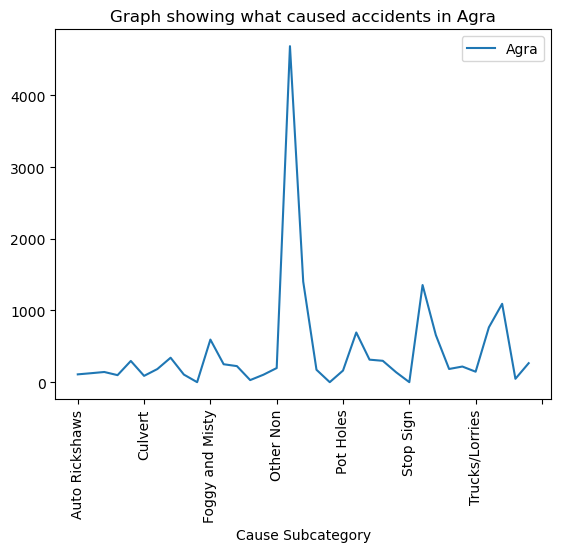

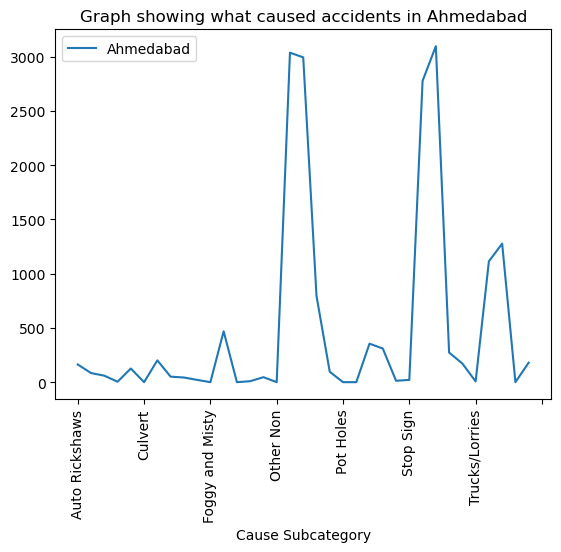

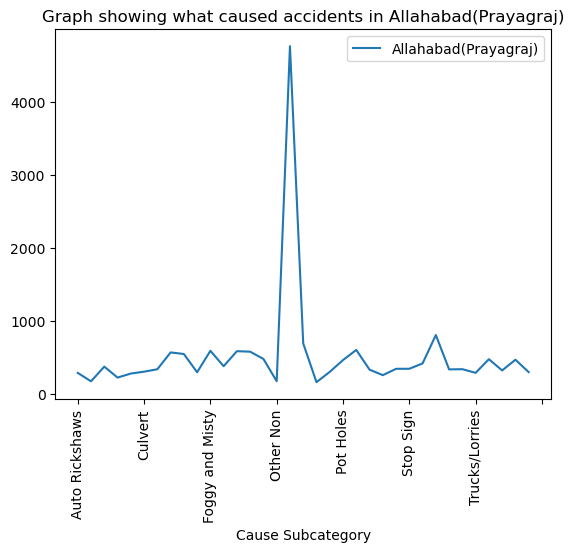

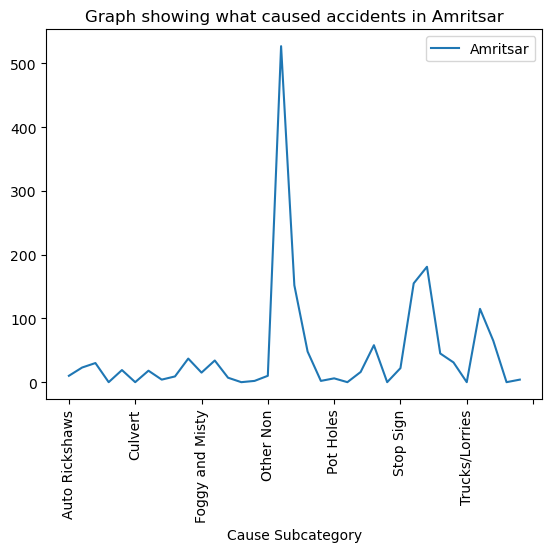

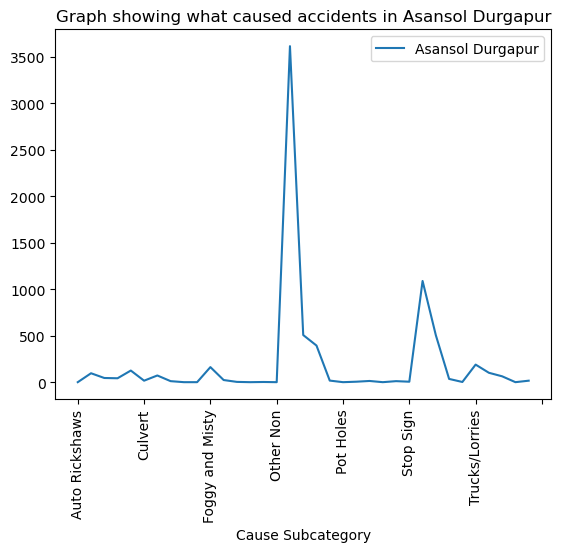

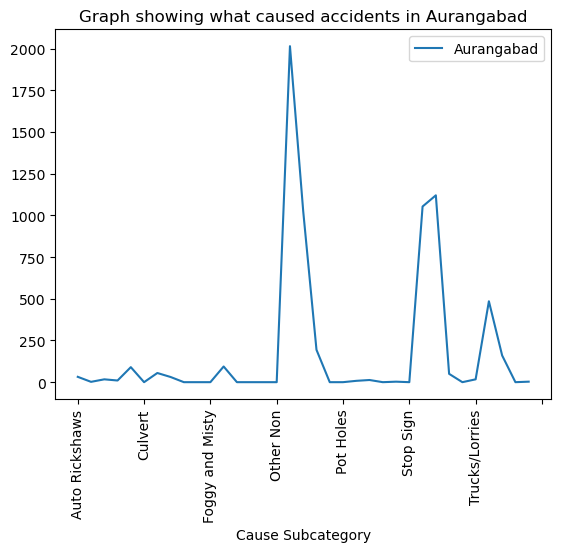

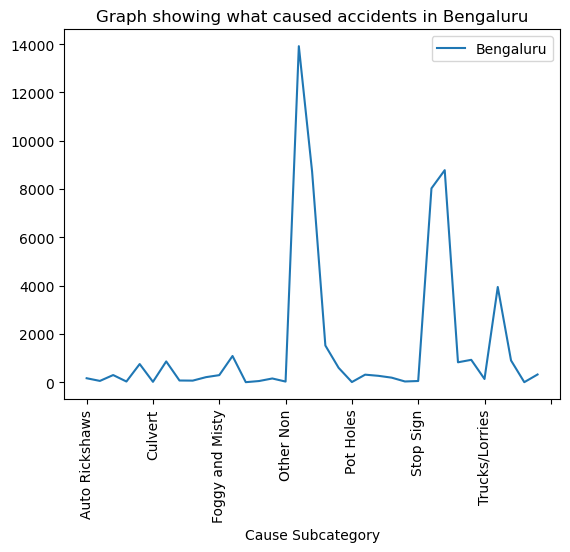

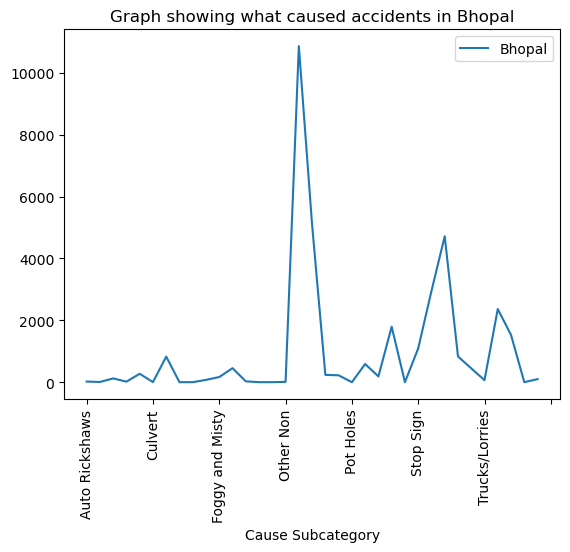

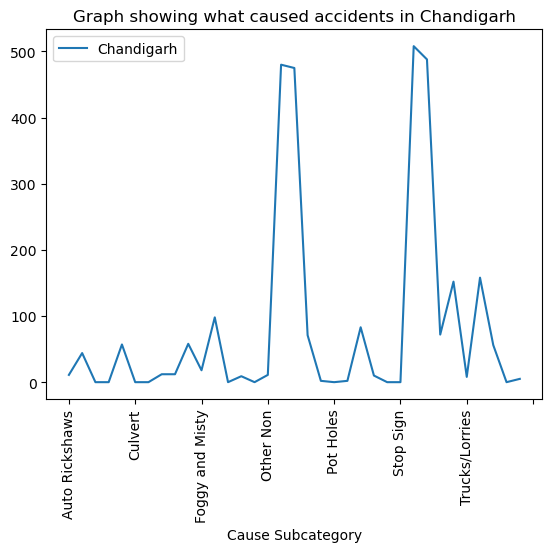

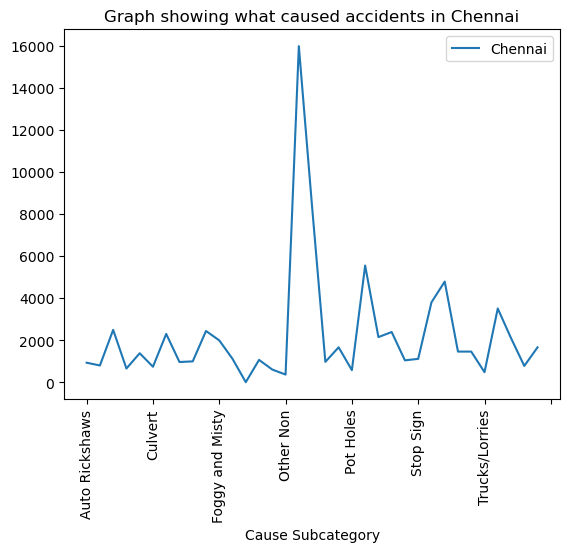

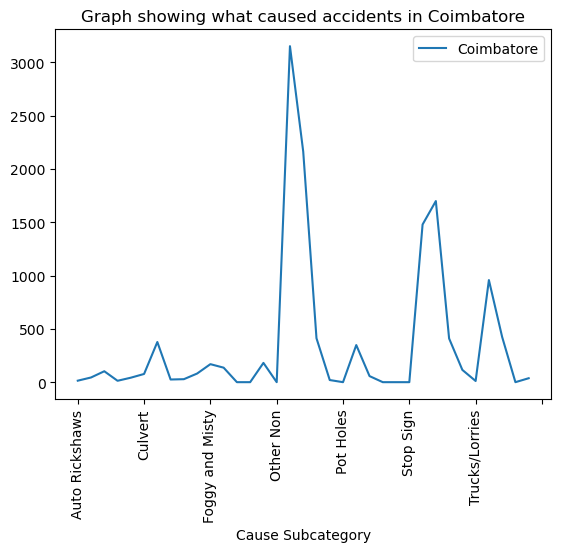

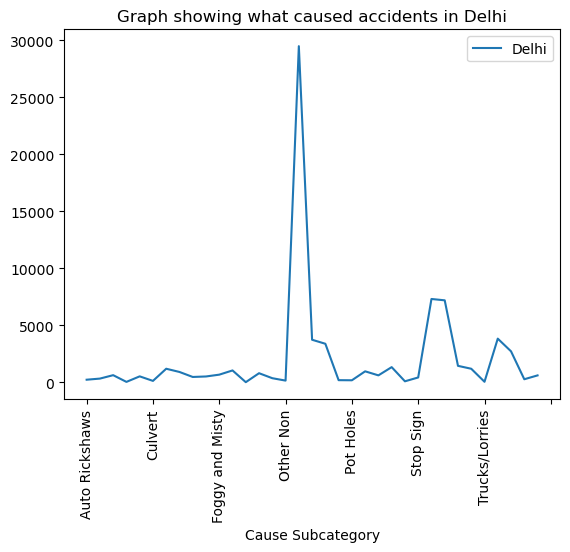

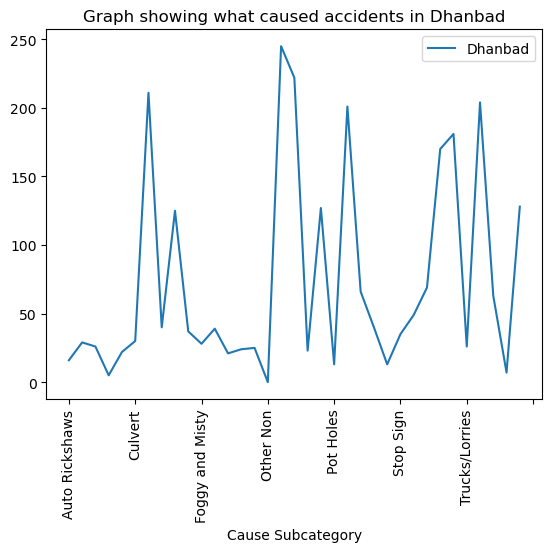

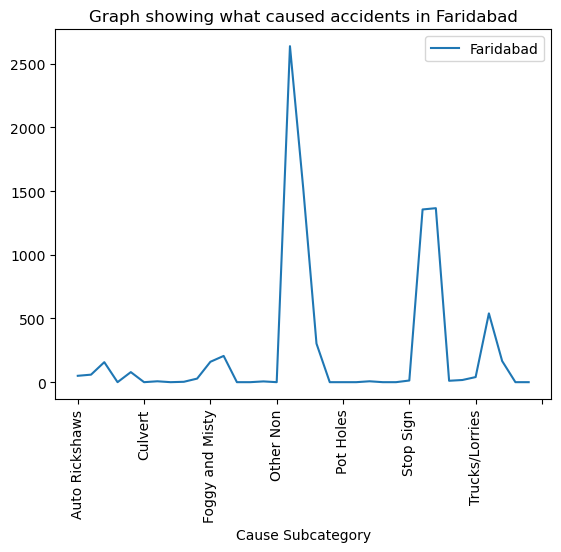

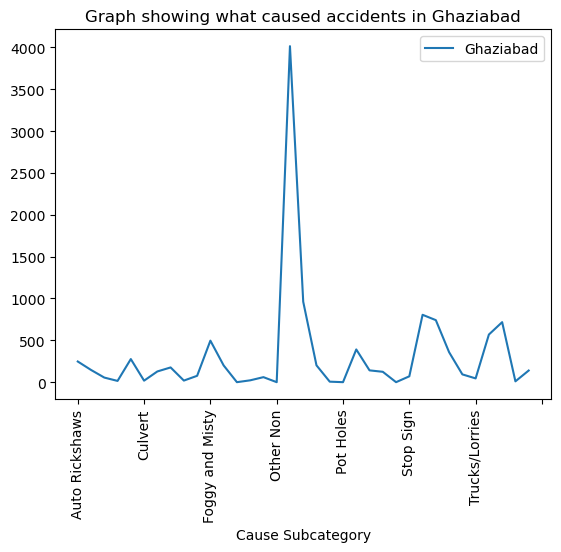

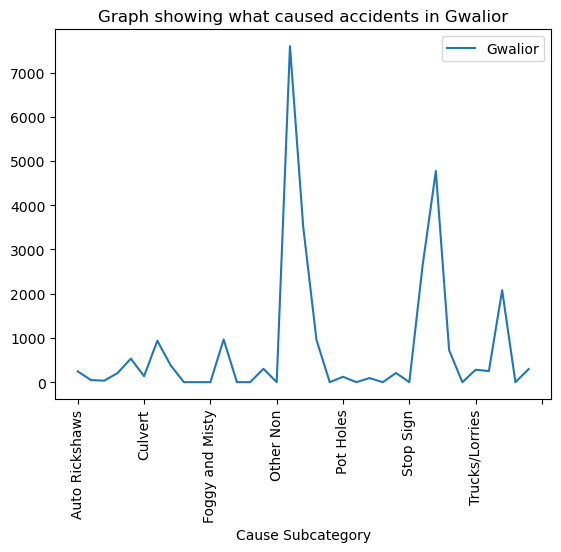

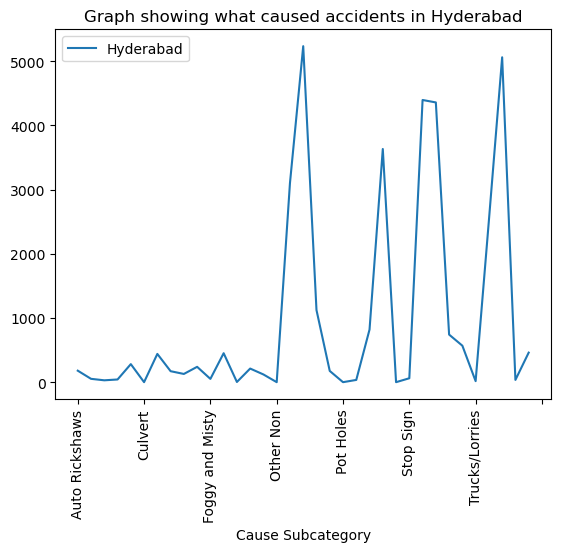

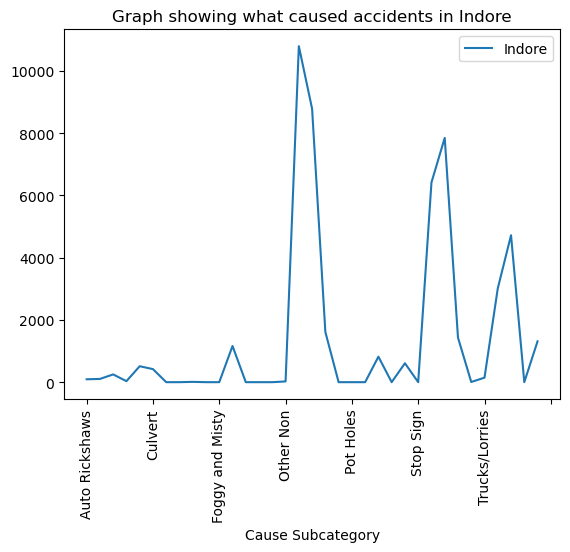

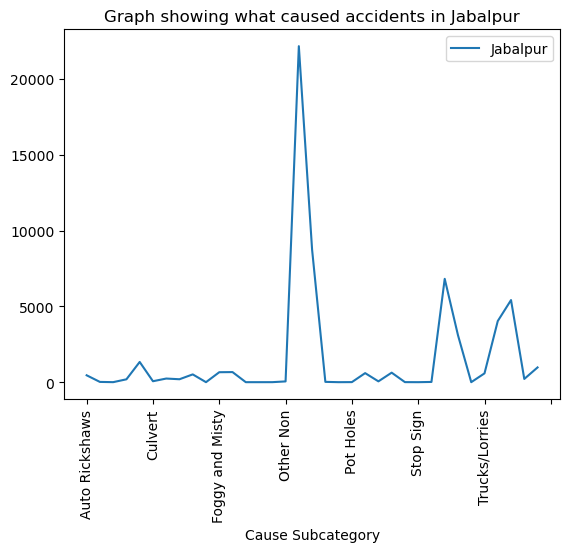

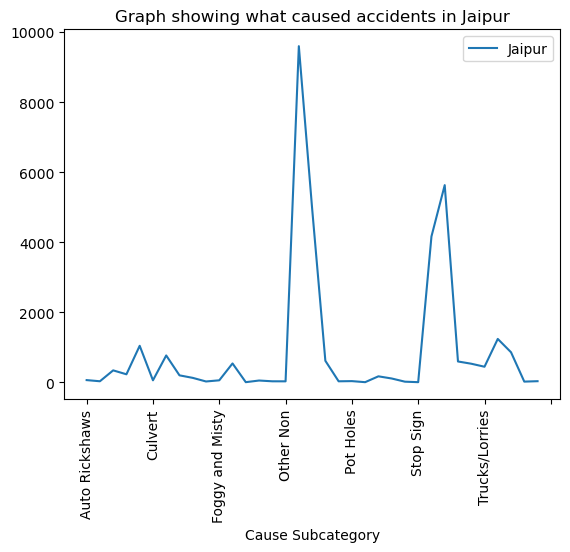

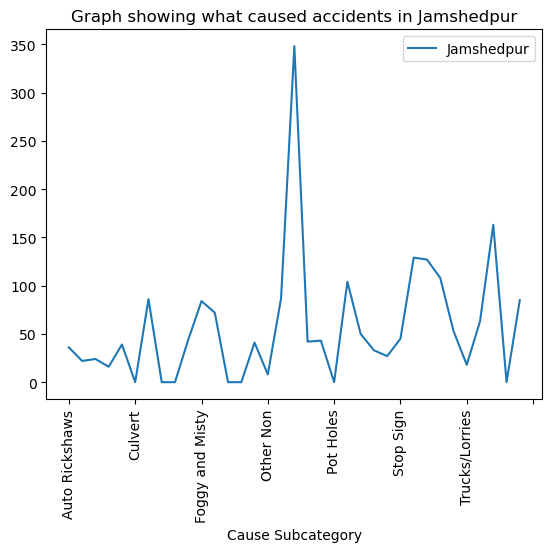

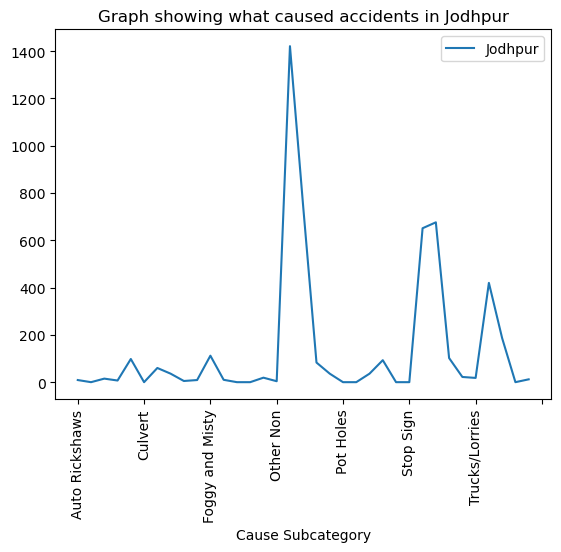

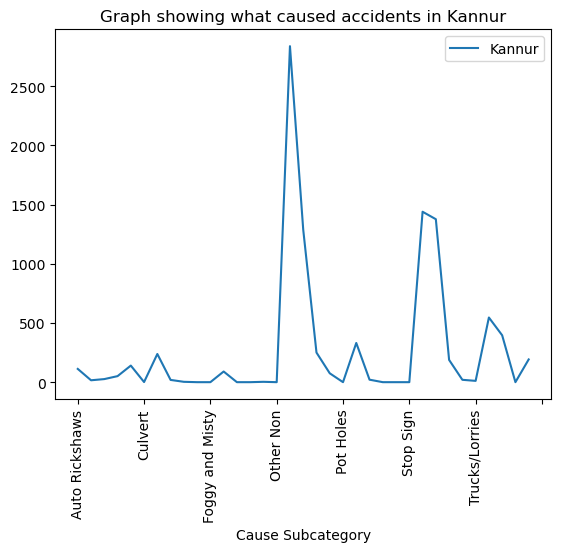

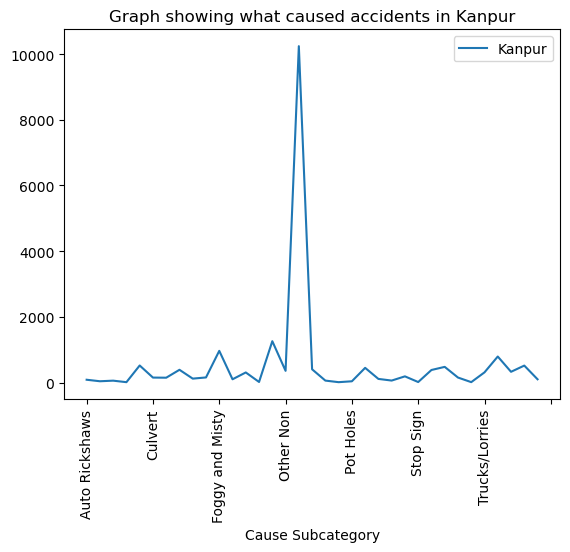

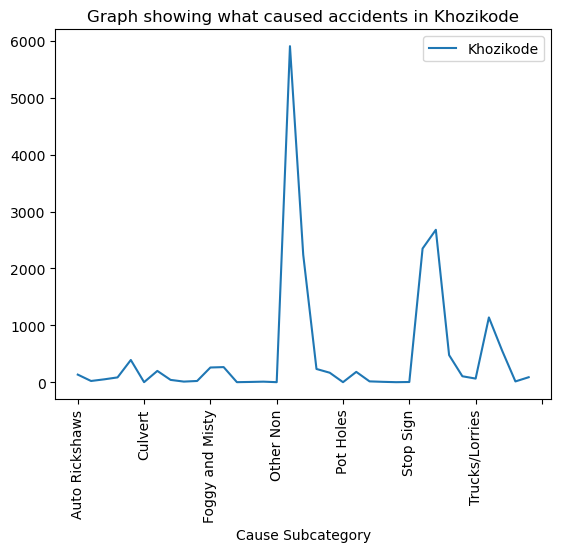

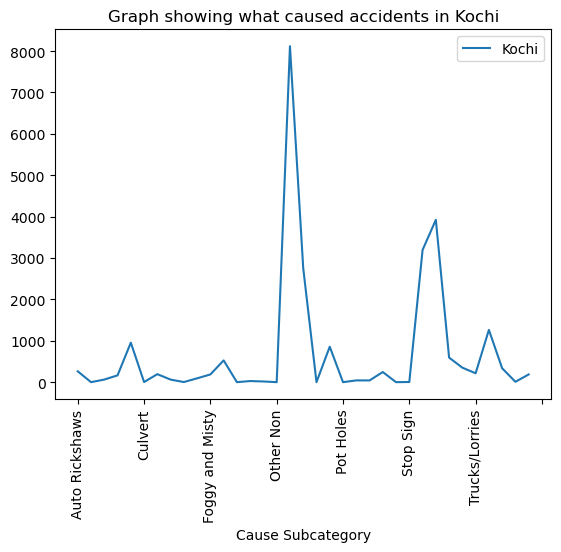

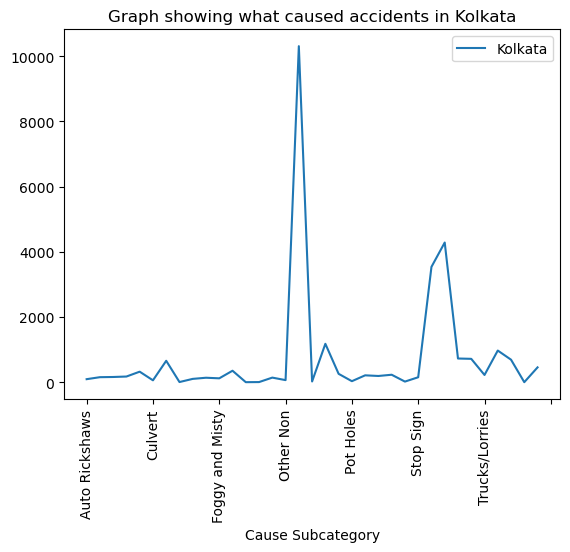

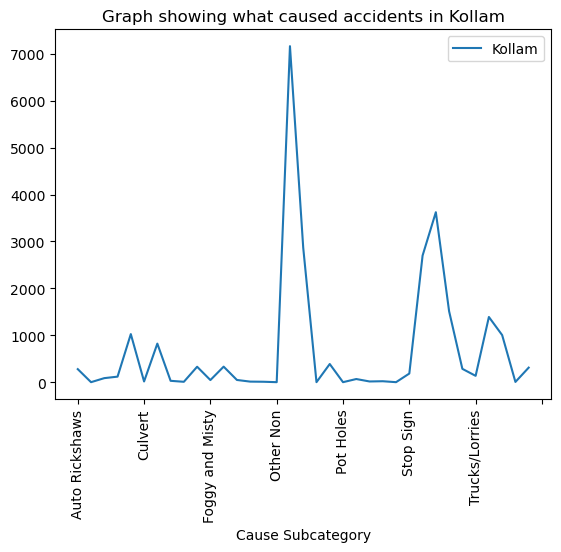

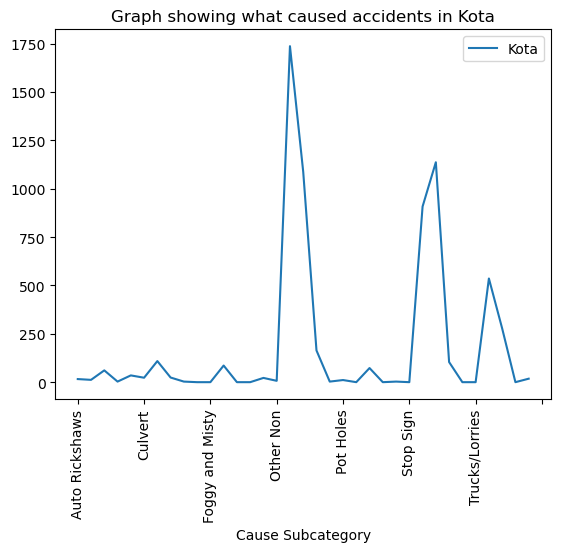

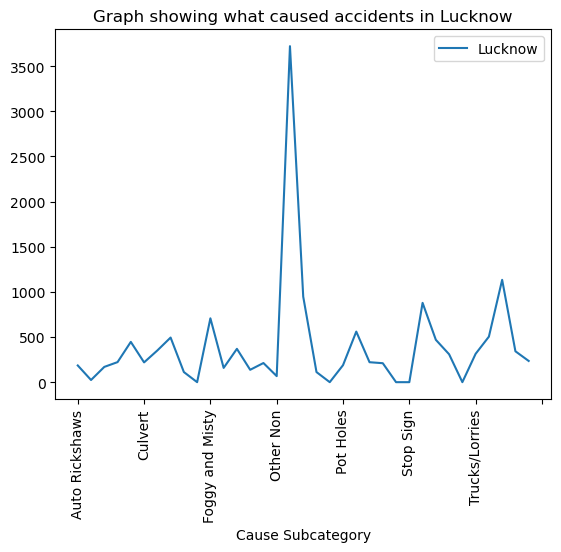

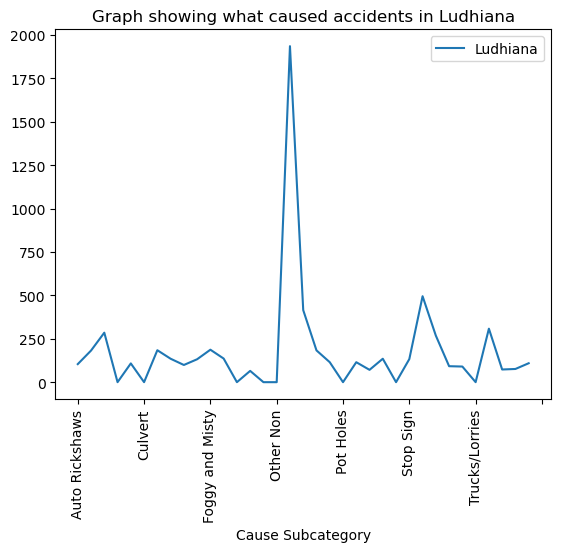

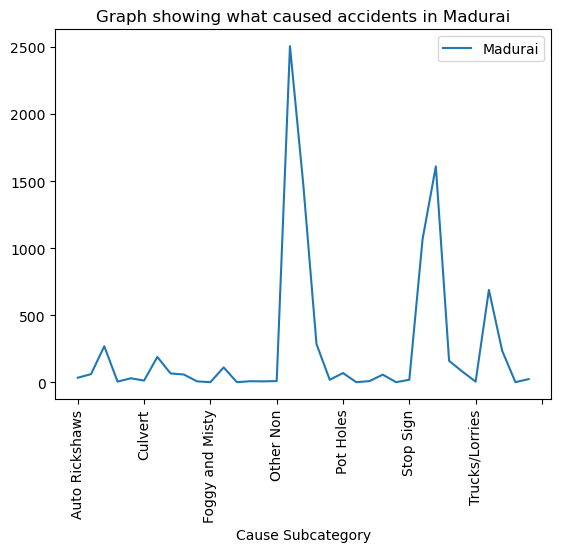

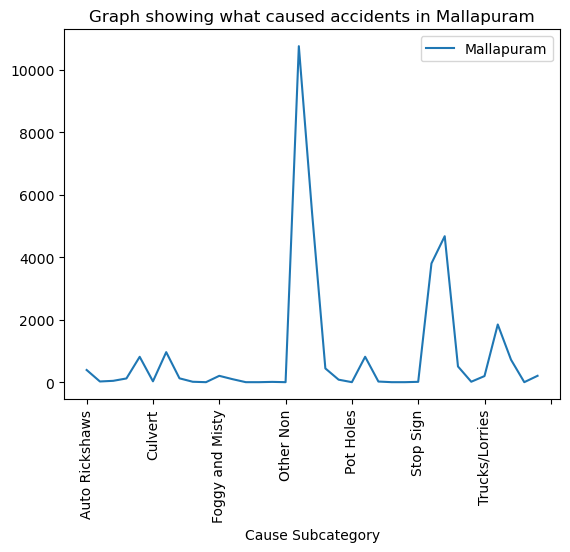

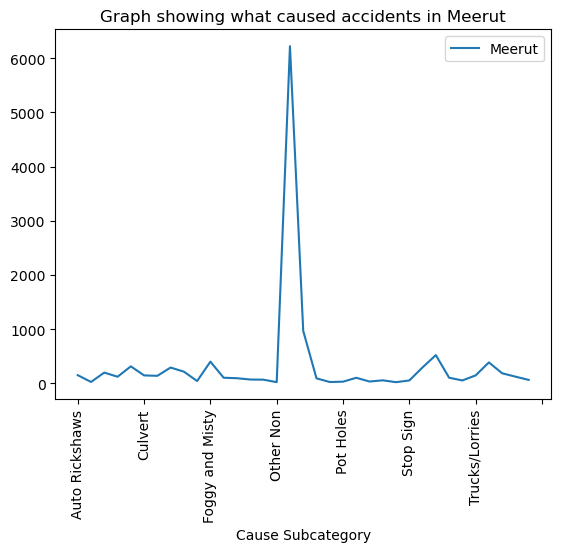

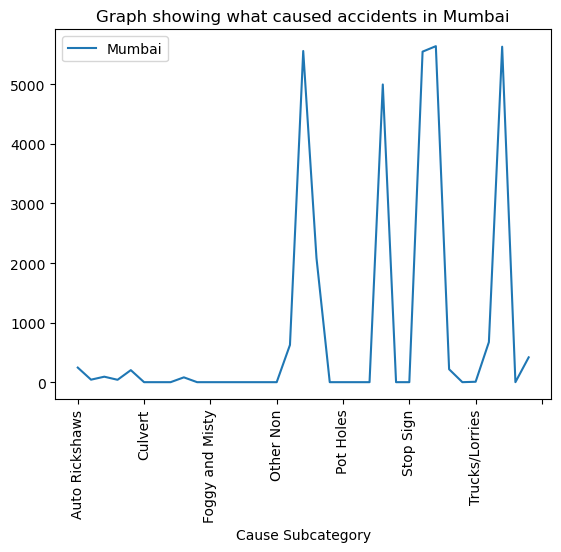

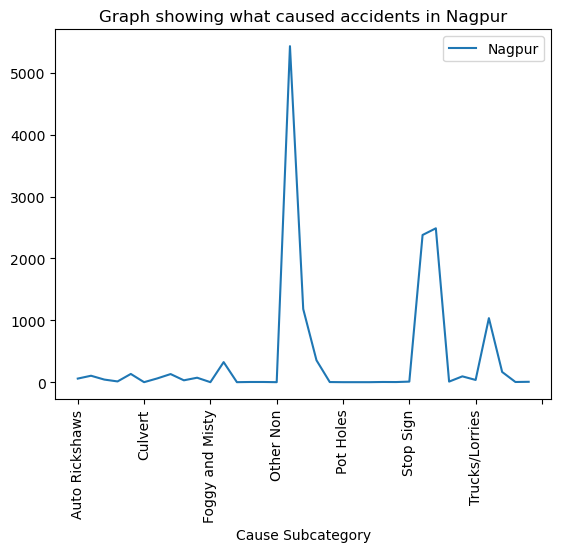

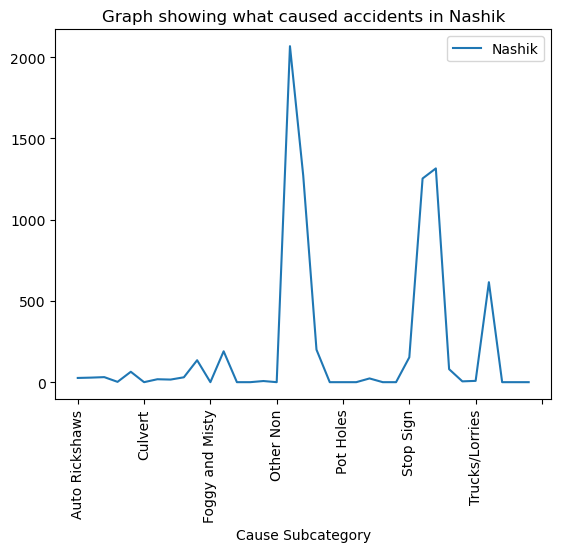

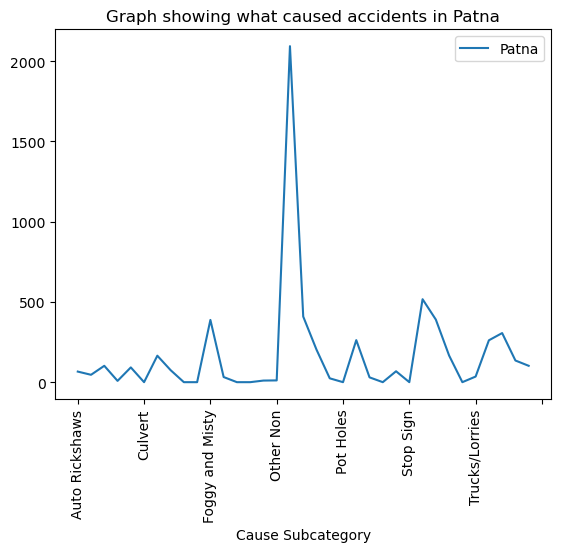

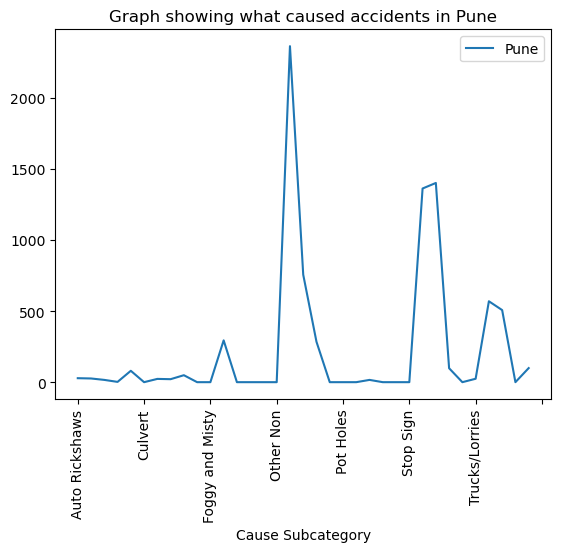

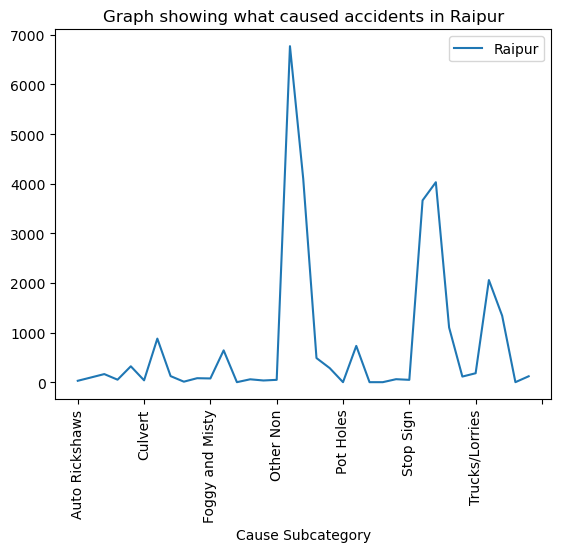

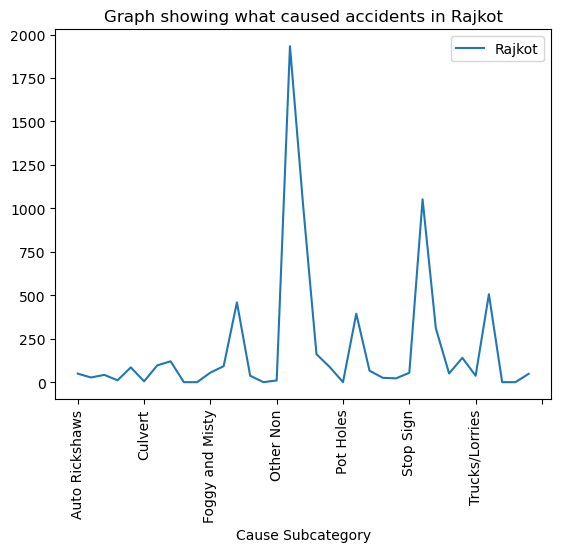

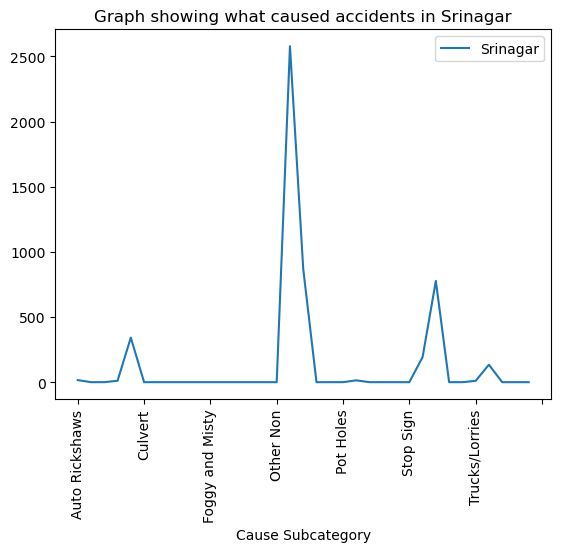

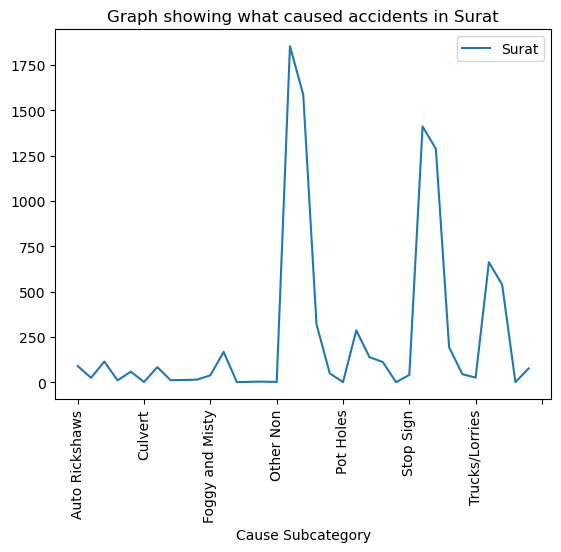

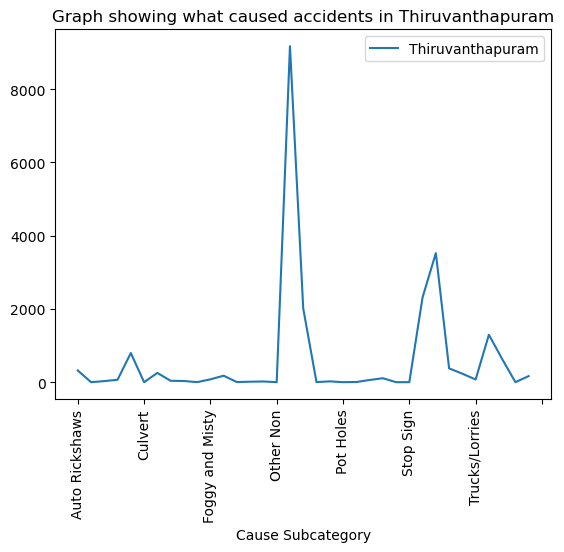

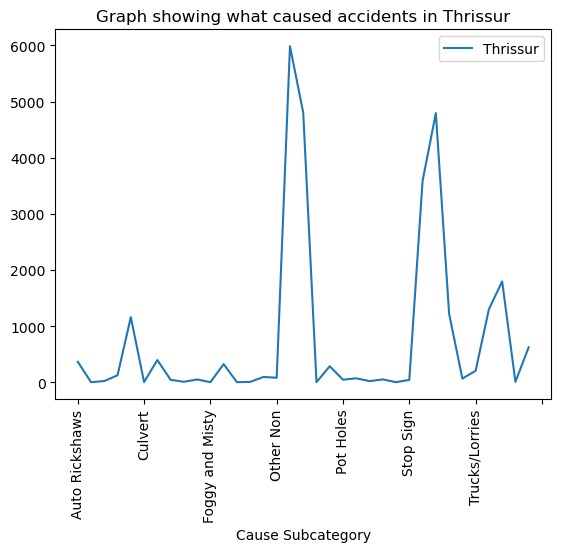

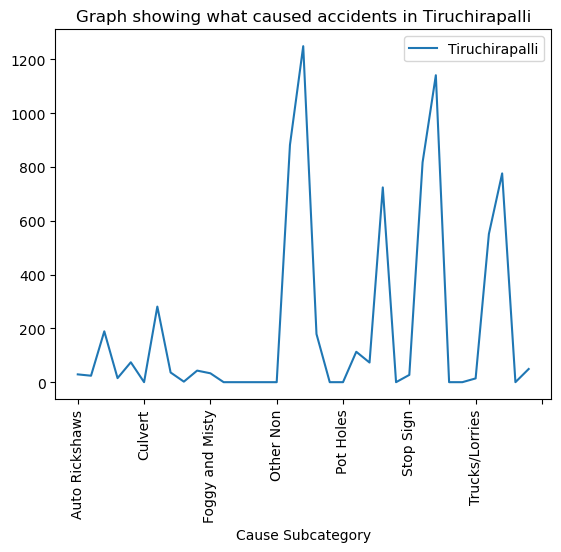

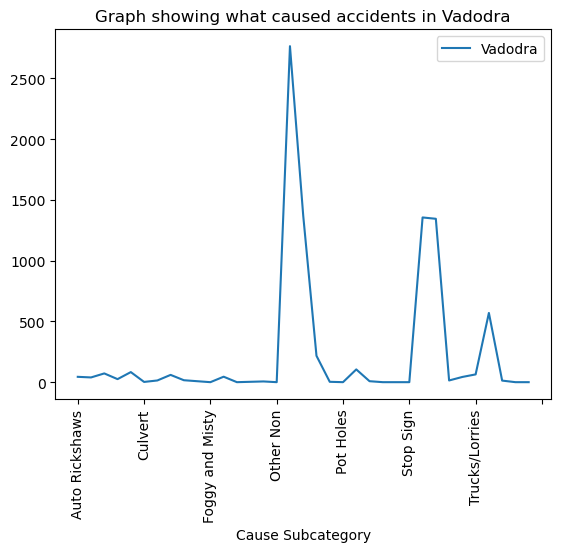

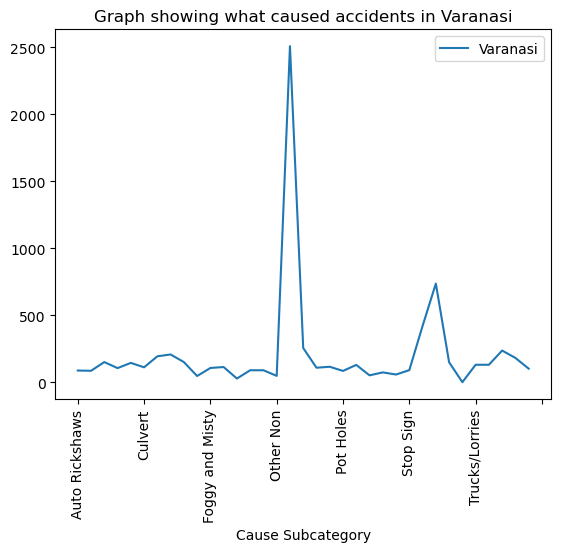

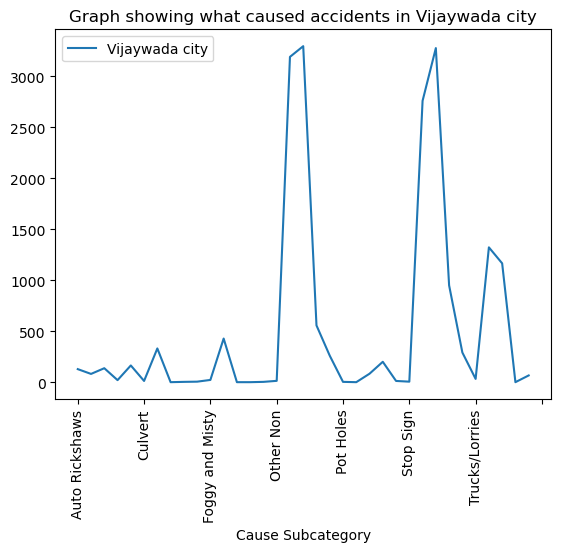

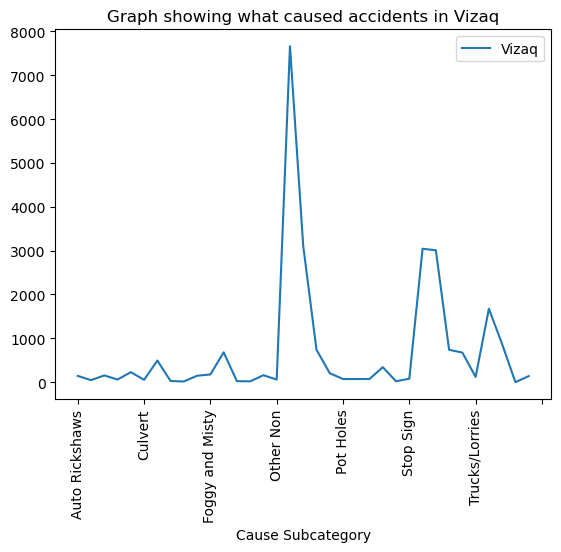

In [83]:
for city in cities_aggregated_by_cause.index:
    cities_aggregated_by_cause.loc[city].plot()
    plt.title('Graph showing what caused accidents in ' + city)
    plt.xticks(rotation=90)
    plt.legend()
    fig.tight_layout()
    plt.show()